Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 



In [1]:
## Import Necessary Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Ignore Warnings:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing Dataset.
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [4]:
# we  have 1000 rows and 40 columns in our dataset.

In [5]:
# Deleting the Unnecessary column:
data.drop(columns=['_c39'],axis=1,inplace=True)

In [6]:
data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       ?               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

In [7]:
# To See the Datacolumns.
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [8]:
# to check the information about the columns:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
# we have no Null values in the dataset.
# we have float 1 column,int-17 columns and object(21)columns.

In [10]:
#Information about columns:
#1.months_as_customer: Number of months of patronage
#2.age: the length of time a customer has lived or a thing has existed
#3.policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
#4.policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
#5.policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
#6.policy_csl: is basically Combined Single Limit
#7.policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
#8.policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
#9.umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
#10.insured_zip: It is the zip code where the insurance was made
#11.insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
#12.insured_education_level: This refers to the Level of education of the customer
#13.insured_occupation: This refers Occupation of the customer
#14.insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
#15.insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
#16.capital-gains: This refers to profit accrued due to insurance premium
#17.capital-loss: This refers to the losses incurred due to insurance claims
#18.incident_date: This refers to the date which claims where made by customers
#19.incident_type: This refers to the type of claim/vehicle damage made by customer
#20.collision_type: This refers to the area of damage on the vehicle
#21.incident_severity: This refers to the extent/level of damage
#22.authorities_contacted: This refers to the government agencies that were contacted after damage
#23.incident_state: This refers to the state at which the accident happened
#24.incident_city: This refers to the city at which the accident happened
#25.1ncident_location: This refers to the location at which the accident happened
#26.incident_hour_of_the_day: The period of the day which accident took place
#27.number_of_vehicles_involved: This refers to number of vehicles involved the accident
#28.property_damage: This refers to whether property was damaged or not
#29.bodily_injuries: This refers to injuries sustained
#30.witnesses: This refers to the number of witnesses involved
#31.police_report_available: This refers to whether the report on damage was documented or not
#32.total_claim_amount: This refers to the financial implications involved in claims
#33.injury_claim: This refers to physical injuries sustained
#34.property_claim: This refers to property damages during incident
#35.vehicle_claim: This refers to property damages during incident
#36.auto_make: This refers to the make of the vehicle
#37.auto_model: This refers to the model of the vehicle
#38.auto_year: This refers to the year which the vehicle was manufactureD)
#39.Fraudlence reported: This is our TARGET variable.,classification problem.


# Data intergrity Check

In [11]:
#To check Null Values:
data.isnull().sum() 

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [12]:
# we have No Null values in the columns.

In [13]:
#To check Null Values:
data.isin(['N/A','n/a','?','-',' ']).any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

# spl charcter handling

In [14]:
# we can see columns['collision_type','property_damage','police_report_available'] are showing True,Means special
# characters are present in the columns.

In [15]:
# we will see the unique characters:
data['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [16]:
data['collision_type']=data['collision_type'].replace('?',np.nan)

In [17]:
data['collision_type'].isnull().sum()

178

In [18]:
# replacing the values with zero
data['collision_type']=data['collision_type'].fillna(0)

In [19]:
data['collision_type'].isnull().sum()

0

In [20]:
data['collision_type']=data['collision_type'].astype('str')
data['collision_type']

0       Side Collision
1                    0
2       Rear Collision
3      Front Collision
4                    0
            ...       
995    Front Collision
996     Rear Collision
997     Side Collision
998     Rear Collision
999                  0
Name: collision_type, Length: 1000, dtype: object

In [21]:
data['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [22]:
data['property_damage']=data['property_damage'].replace('?',np.nan)

In [23]:
data['property_damage'].isnull().sum()

360

In [24]:
data['property_damage'].fillna(0)


0      YES
1        0
2       NO
3        0
4       NO
      ... 
995    YES
996    YES
997      0
998      0
999      0
Name: property_damage, Length: 1000, dtype: object

In [25]:
data['property_damage']=data['property_damage'].fillna(0)

In [26]:
data['property_damage'].isnull().sum()

0

In [27]:
data['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [28]:
data['police_report_available']=data['police_report_available'].replace("?",0)

In [29]:
data['police_report_available']

0      YES
1        0
2       NO
3       NO
4       NO
      ... 
995      0
996      0
997    YES
998    YES
999      0
Name: police_report_available, Length: 1000, dtype: object

In [30]:
# rechecking the special charcters nw:
data.isin(['N/A','n/a','?','-',' ']).any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [31]:
# Its false for all the columns.
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [32]:
# To Check Any Duplicate Values are present:
data.drop_duplicates(inplace=True)
data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       0               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       0              87200   
996       608177  ...         3                       0             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       0               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

In [33]:
# the datashape remains same,no duplicates present in the column.

In [34]:
# dropping the column,"age,policy_number",'policy_bind_date' columns from the Dataset

In [35]:
data.drop(columns=['age','policy_number','policy_bind_date'],axis=1,inplace=True)

In [36]:
data

months_as_customer policy_state policy_csl  policy_deductable  \
0                   328           OH    250/500               1000   
1                   228           IN    250/500               2000   
2                   134           OH    100/300               2000   
3                   256           IL    250/500               2000   
4                   228           IL   500/1000               1000   
..                  ...          ...        ...                ...   
995                   3           OH   500/1000               1000   
996                 285           IL    100/300               1000   
997                 130           OH    250/500                500   
998                 458           IL   500/1000               2000   
999                 456           OH    250/500               1000   

     policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                  1406.91               0       466132        MALE   
1                  1197.22         5000000       468176        MALE   
2                  1413.14         5000000       430632      FEMALE   
3                  1415.74         6000000       608117      FEMALE   
4                  1583.91         6000000       610706        MALE   
..                     ...             ...          ...         ...   
995                1310.80               0       431289      FEMALE   
996                1436.79               0       608177      FEMALE   
997                1383.49         3000000       442797      FEMALE   
998                1356.92         5000000       441714        MALE   
999                 766.19               0       612260      FEMALE   

    insured_education_level insured_occupation  ... witnesses  \
0                        MD       craft-repair  ...         2   
1                        MD  machine-op-inspct  ...         0   
2                       PhD              sales  ...         3   
3                       PhD       armed-forces  ...         2   
4                 Associate              sales  ...         1   
..                      ...                ...  ...       ...   
995                 Masters       craft-repair  ...         1   
996                     PhD     prof-specialty  ...         3   
997                 Masters       armed-forces  ...         3   
998               Associate  handlers-cleaners  ...         1   
999               Associate              sales  ...         3   

    police_report_available  total_claim_amount  injury_claim property_claim  \
0                       YES               71610          6510          13020   
1                         0                5070           780            780   
2                        NO               34650          7700           3850   
3                        NO               63400          6340           6340   
4                        NO                6500          1300            650   
..                      ...                 ...           ...            ...   
995                       0               87200         17440           8720   
996                       0              108480         18080          18080   
997                     YES               67500          7500           7500   
998                     YES               46980          5220           5220   
999                       0                5060           460            920   

    vehicle_claim   auto_make auto_model auto_year fraud_reported  
0           52080        Saab        92x      2004              Y  
1            3510    Mercedes       E400      2007              Y  
2           23100       Dodge        RAM      2007              N  
3           50720   Chevrolet      Tahoe      2014              Y  
4            4550      Accura        RSX      2009              N  
..            ...         ...        ...       ...            ...  
995         61040       Honda     Accord      2006              N  
996         72320  Volksw

In [37]:
data.columns

Index(['months_as_customer', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [38]:
data['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [39]:
# we will replace the ['250/500'] csl as 0.
# we will replace the['100/300']csl as 1
#we will replace the ['500/1000'] csl as 2.

In [40]:
data['policy_csl']=data['policy_csl'].replace('250/500',0)
data['policy_csl']=data['policy_csl'].replace('100/300',1)
data['policy_csl']=data['policy_csl'].replace('500/1000',2)

In [41]:
data['policy_csl'].value_counts()

0    351
1    349
2    300
Name: policy_csl, dtype: int64

# statistical summary

In [42]:
data.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
policy_csl                   1000.0  9.490000e-01  8.056352e-01        0.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
policy_csl                        0.0000       1.0       2.000         2.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00

In [43]:
#observations:
#count is same for all the columns
# some columns ,STD is high than mean,which means skewness is present.
# some columns the Max is very high,which means outliers are there ,further will analyze with EDA.

#  categorising before EDA.

In [44]:
data.columns

Index(['months_as_customer', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [45]:
data_numerical=data[['months_as_customer','policy_csl','policy_deductable','policy_annual_premium', 'umbrella_limit', 'insured_zip',
                    'capital-gains', 'capital-loss','incident_hour_of_the_day','auto_year',
       'number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim']].copy()

In [46]:
data_numerical

months_as_customer  policy_csl  policy_deductable  policy_annual_premium  \
0                   328           0               1000                1406.91   
1                   228           0               2000                1197.22   
2                   134           1               2000                1413.14   
3                   256           0               2000                1415.74   
4                   228           2               1000                1583.91   
..                  ...         ...                ...                    ...   
995                   3           2               1000                1310.80   
996                 285           1               1000                1436.79   
997                 130           0                500                1383.49   
998                 458           2               2000                1356.92   
999                 456           0               1000                 766.19   

     umbrella_limit  insured_zip  capital-gains  capital-loss  \
0                 0       466132          53300             0   
1           5000000       468176              0             0   
2           5000000       430632          35100             0   
3           6000000       608117          48900        -62400   
4           6000000       610706          66000        -46000   
..              ...          ...            ...           ...   
995               0       431289              0             0   
996               0       608177          70900             0   
997         3000000       442797          35100             0   
998         5000000       441714              0             0   
999               0       612260              0             0   

     incident_hour_of_the_day  auto_year  number_of_vehicles_involved  \
0                           5       2004                            1   
1                           8       2007                            1   
2                           7       2007                            3   
3                           5       2014                            1   
4                          20       2009                            1   
..                        ...        ...                          ...   
995                        20       2006                            1   
996                        23       2015                            1   
997                         4       1996                            3   
998                         2       1998                            1   
999                         6       2007                            1   

     bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                  1          2               71610          6510   
1                  0          0                5070           780   
2                  2          3               34650          7700   
3                  1          2               63400          6340   
4                  0          1                6500          1300   
..               ...        ...                 ...           ...   
995                0          1               87200         17440   
996                2          3              108480         18080   
997                2          3               67500          7500   
998                0          1               46980          5220   
999                0          3                5060           460   

     property_claim  vehicle_claim  
0             13020          52080  
1               780           3510  
2              3850          23100  
3              6340          50720  
4               650           4550  
..              ...            ...  
995            8720          61040  
996           18080          72320  
997            7500          52500  
998            5220          36540  
999             920           3680  

[1000 rows x 17 columns]

In [47]:
data_categorical=data[['policy_state','insured_sex','insured_education_level', 'insured_occupation', 'insured_hobbies',
                      'insured_relationship','incident_date', 'incident_type', 'collision_type', 'incident_severity',
                      'authorities_contacted', 'incident_state', 'incident_city','incident_location','property_damage',
                      'police_report_available','auto_make','auto_model','fraud_reported']].copy()

In [48]:
data_categorical

policy_state insured_sex insured_education_level insured_occupation  \
0             OH        MALE                      MD       craft-repair   
1             IN        MALE                      MD  machine-op-inspct   
2             OH      FEMALE                     PhD              sales   
3             IL      FEMALE                     PhD       armed-forces   
4             IL        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995           OH      FEMALE                 Masters       craft-repair   
996           IL      FEMALE                     PhD     prof-specialty   
997           OH      FEMALE                 Masters       armed-forces   
998           IL        MALE               Associate  handlers-cleaners   
999           OH      FEMALE               Associate              sales   

    insured_hobbies insured_relationship incident_date  \
0          sleeping              husband    25-01-2015   
1           reading       other-relative    21-01-2015   
2       board-games            own-child    22-02-2015   
3       board-games            unmarried    10-01-2015   
4       board-games            unmarried    17-02-2015   
..              ...                  ...           ...   
995       paintball            unmarried    22-02-2015   
996        sleeping                 wife    24-01-2015   
997  bungie-jumping       other-relative    23-01-2015   
998    base-jumping                 wife    26-02-2015   
999        kayaking              husband    26-02-2015   

                incident_type   collision_type incident_severity  \
0    Single Vehicle Collision   Side Collision      Major Damage   
1               Vehicle Theft                0      Minor Damage   
2     Multi-vehicle Collision   Rear Collision      Minor Damage   
3    Single Vehicle Collision  Front Collision      Major Damage   
4               Vehicle Theft                0      Minor Damage   
..                        ...              ...               ...   
995  Single Vehicle Collision  Front Collision      Minor Damage   
996  Single Vehicle Collision   Rear Collision      Major Damage   
997   Multi-vehicle Collision   Side Collision      Minor Damage   
998  Single Vehicle Collision   Rear Collision      Major Damage   
999                Parked Car                0      Minor Damage   

    authorities_contacted incident_state incident_city    incident_location  \
0                  Police             SC      Columbus       9935 4th Drive   
1                  Police             VA     Riverwood         6608 MLK Hwy   
2                  Police             NY      Columbus    7121 Francis Lane   
3                  Police             OH     Arlington     6956 Maple Drive   
4                    None             NY     Arlington         3041 3rd Ave   
..                    ...            ...           ...                  ...   
995                  Fire             NC    Northbrook   6045 Andromedia St   
996                  Fire             SC     Northbend     3092 Texas Drive   
997                Police             NC     Arlington          7629 5th St   
998                 Other             NY     Arlington        6128 Elm Lane   
999                Police             WV      Columbus  1416 Cherokee Ridge   

    property_damage police_report_available   auto_make auto_model  \
0               YES                     YES        Saab        92x   
1                 0                       0    Mercedes       E400   
2                NO                      NO       Dodge        RAM   
3                 0                      NO   Chevrolet      Tahoe   
4                NO                      NO      Accura        RSX   
..              ...                     ...         ...        ...   
995             YES                       0       Honda     Accord   
996             YES                       0  Volkswagen     Passat   
997       

In [49]:
data.shape

(1000, 36)

In [50]:
data['property_damage']=data['property_damage'].astype('object')


In [51]:
data

months_as_customer policy_state  policy_csl  policy_deductable  \
0                   328           OH           0               1000   
1                   228           IN           0               2000   
2                   134           OH           1               2000   
3                   256           IL           0               2000   
4                   228           IL           2               1000   
..                  ...          ...         ...                ...   
995                   3           OH           2               1000   
996                 285           IL           1               1000   
997                 130           OH           0                500   
998                 458           IL           2               2000   
999                 456           OH           0               1000   

     policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                  1406.91               0       466132        MALE   
1                  1197.22         5000000       468176        MALE   
2                  1413.14         5000000       430632      FEMALE   
3                  1415.74         6000000       608117      FEMALE   
4                  1583.91         6000000       610706        MALE   
..                     ...             ...          ...         ...   
995                1310.80               0       431289      FEMALE   
996                1436.79               0       608177      FEMALE   
997                1383.49         3000000       442797      FEMALE   
998                1356.92         5000000       441714        MALE   
999                 766.19               0       612260      FEMALE   

    insured_education_level insured_occupation  ... witnesses  \
0                        MD       craft-repair  ...         2   
1                        MD  machine-op-inspct  ...         0   
2                       PhD              sales  ...         3   
3                       PhD       armed-forces  ...         2   
4                 Associate              sales  ...         1   
..                      ...                ...  ...       ...   
995                 Masters       craft-repair  ...         1   
996                     PhD     prof-specialty  ...         3   
997                 Masters       armed-forces  ...         3   
998               Associate  handlers-cleaners  ...         1   
999               Associate              sales  ...         3   

    police_report_available  total_claim_amount  injury_claim property_claim  \
0                       YES               71610          6510          13020   
1                         0                5070           780            780   
2                        NO               34650          7700           3850   
3                        NO               63400          6340           6340   
4                        NO                6500          1300            650   
..                      ...                 ...           ...            ...   
995                       0               87200         17440           8720   
996                       0              108480         18080          18080   
997                     YES               67500          7500           7500   
998                     YES               46980          5220           5220   
999                       0                5060           460            920   

    vehicle_claim   auto_make auto_model auto_year fraud_reported  
0           52080        Saab        92x      2004              Y  
1            3510    Mercedes       E400      2007              Y  
2           23100       Dodge        RAM      2007              N  
3           50720   Chevrolet      Tahoe      2014              Y  
4            4550      Accura        RSX      2009              N  
..            ...         ...        ...       ...            ...  
995         61040       Honda     Accord      2006              N  
996         7

In [52]:
data['property_damage']

0      YES
1        0
2       NO
3        0
4       NO
      ... 
995    YES
996    YES
997      0
998      0
999      0
Name: property_damage, Length: 1000, dtype: object

In [53]:
data['property_damage']=data['property_damage'].replace('nan',0)

In [54]:
data['property_damage']

0      YES
1        0
2       NO
3        0
4       NO
      ... 
995    YES
996    YES
997      0
998      0
999      0
Name: property_damage, Length: 1000, dtype: object

In [55]:
data_categorical['property_damage']=data['property_damage']

In [56]:
data_categorical

policy_state insured_sex insured_education_level insured_occupation  \
0             OH        MALE                      MD       craft-repair   
1             IN        MALE                      MD  machine-op-inspct   
2             OH      FEMALE                     PhD              sales   
3             IL      FEMALE                     PhD       armed-forces   
4             IL        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995           OH      FEMALE                 Masters       craft-repair   
996           IL      FEMALE                     PhD     prof-specialty   
997           OH      FEMALE                 Masters       armed-forces   
998           IL        MALE               Associate  handlers-cleaners   
999           OH      FEMALE               Associate              sales   

    insured_hobbies insured_relationship incident_date  \
0          sleeping              husband    25-01-2015   
1           reading       other-relative    21-01-2015   
2       board-games            own-child    22-02-2015   
3       board-games            unmarried    10-01-2015   
4       board-games            unmarried    17-02-2015   
..              ...                  ...           ...   
995       paintball            unmarried    22-02-2015   
996        sleeping                 wife    24-01-2015   
997  bungie-jumping       other-relative    23-01-2015   
998    base-jumping                 wife    26-02-2015   
999        kayaking              husband    26-02-2015   

                incident_type   collision_type incident_severity  \
0    Single Vehicle Collision   Side Collision      Major Damage   
1               Vehicle Theft                0      Minor Damage   
2     Multi-vehicle Collision   Rear Collision      Minor Damage   
3    Single Vehicle Collision  Front Collision      Major Damage   
4               Vehicle Theft                0      Minor Damage   
..                        ...              ...               ...   
995  Single Vehicle Collision  Front Collision      Minor Damage   
996  Single Vehicle Collision   Rear Collision      Major Damage   
997   Multi-vehicle Collision   Side Collision      Minor Damage   
998  Single Vehicle Collision   Rear Collision      Major Damage   
999                Parked Car                0      Minor Damage   

    authorities_contacted incident_state incident_city    incident_location  \
0                  Police             SC      Columbus       9935 4th Drive   
1                  Police             VA     Riverwood         6608 MLK Hwy   
2                  Police             NY      Columbus    7121 Francis Lane   
3                  Police             OH     Arlington     6956 Maple Drive   
4                    None             NY     Arlington         3041 3rd Ave   
..                    ...            ...           ...                  ...   
995                  Fire             NC    Northbrook   6045 Andromedia St   
996                  Fire             SC     Northbend     3092 Texas Drive   
997                Police             NC     Arlington          7629 5th St   
998                 Other             NY     Arlington        6128 Elm Lane   
999                Police             WV      Columbus  1416 Cherokee Ridge   

    property_damage police_report_available   auto_make auto_model  \
0               YES                     YES        Saab        92x   
1                 0                       0    Mercedes       E400   
2                NO                      NO       Dodge        RAM   
3                 0                      NO   Chevrolet      Tahoe   
4                NO                      NO      Accura        RSX   
..              ...                     ...         ...        ...   
995             YES                       0       Honda     Accord   
996             YES                       0  Volkswagen     Passat   
997       

#                                      EDA

In [57]:
data_numerical.columns

Index(['months_as_customer', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'auto_year', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


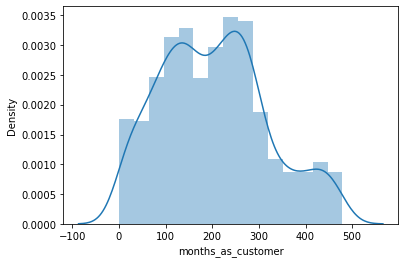

In [58]:
print(data_numerical['months_as_customer'].value_counts())
sns.distplot(data['months_as_customer'])
plt.show()

In [59]:
# The Data follows normal distribution from 0 to 450.

0    351
1    349
2    300
Name: policy_csl, dtype: int64


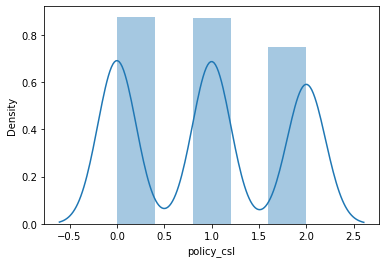

In [60]:
print(data_numerical['policy_csl'].value_counts())
sns.distplot(data['policy_csl'])
plt.show()

In [61]:
# The data is scattered and the distribution is like this.

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


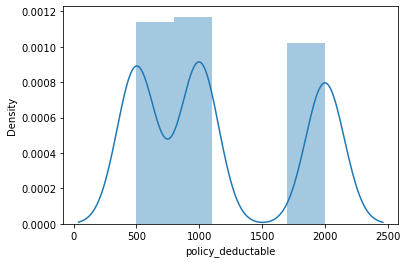

In [62]:
print(data_numerical['policy_deductable'].value_counts())
sns.distplot(data['policy_deductable'])
plt.show()

In [63]:
# follows normal distribution from 0 to 1000 and 1700 to 2400.

1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1
766.19     1
Name: policy_annual_premium, Length: 991, dtype: int64


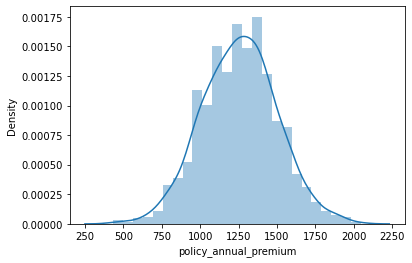

In [64]:
print(data_numerical['policy_annual_premium'].value_counts())
sns.distplot(data['policy_annual_premium'])
plt.show()

In [65]:
#This column follows normal distribution from 500 to 2000.

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64


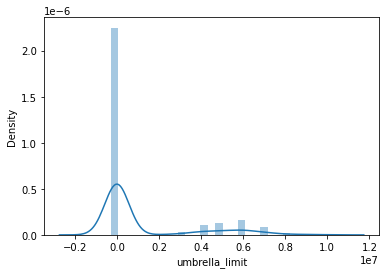

In [66]:
print(data_numerical['umbrella_limit'].value_counts())
sns.distplot(data['umbrella_limit'])
plt.show()

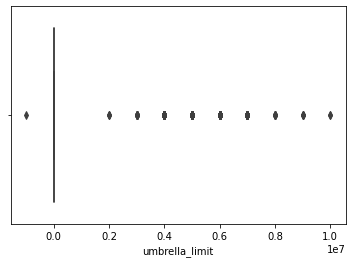

In [67]:
sns.boxplot(data['umbrella_limit']) # we have outliers also.
plt.show()

477695    2
469429    2
446895    2
431202    2
456602    2
         ..
476303    1
450339    1
476502    1
600561    1
612260    1
Name: insured_zip, Length: 995, dtype: int64


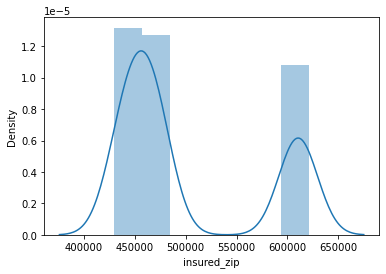

In [68]:
print(data_numerical['insured_zip'].value_counts())
sns.distplot(data['insured_zip'])
plt.show()

In [69]:
# These are unique values in the full columns,so removing the column from the dataset.
data.drop(columns=['insured_zip'],axis=1,inplace=True)

In [70]:
data_numerical.drop(columns=['insured_zip'],axis=1,inplace=True)

In [71]:
data_numerical.columns

Index(['months_as_customer', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day', 'auto_year',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

0        508
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: capital-gains, Length: 338, dtype: int64


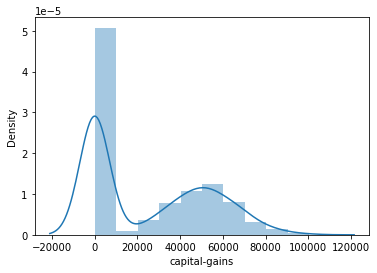

In [72]:
print(data_numerical['capital-gains'].value_counts())
sns.distplot(data['capital-gains'])
plt.show()

In [73]:
#follows normal distribution from 20000 to 80000,followed by skewness

 0        475
-31700      5
-53700      5
-50300      5
-45300      4
         ... 
-12100      1
-17000      1
-72900      1
-19700      1
-82100      1
Name: capital-loss, Length: 354, dtype: int64


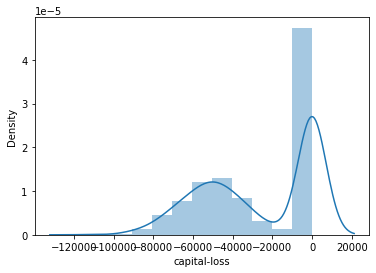

In [74]:
print(data_numerical['capital-loss'].value_counts())
sns.distplot(data_numerical['capital-loss'])
plt.show()

17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64


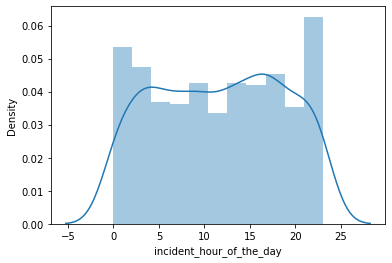

In [75]:
print(data_numerical['incident_hour_of_the_day'].value_counts())
sns.distplot(data_numerical['incident_hour_of_the_day'])
plt.show()

In [76]:
# This column follows normal distribution from 0 to 24hrs.

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


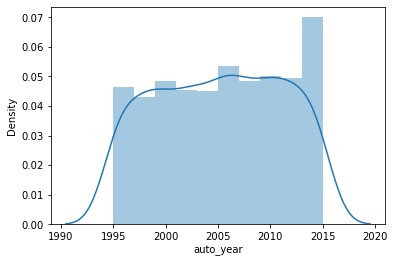

In [77]:
print(data_numerical['auto_year'].value_counts())
sns.distplot(data_numerical['auto_year'])
plt.show()

In [78]:
# the Data follows normal distribution from 1995 to  2015.

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


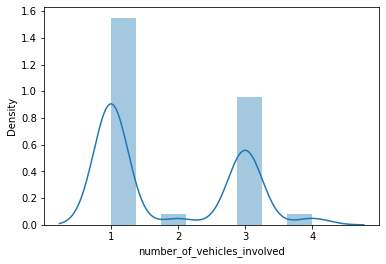

In [79]:
print(data_numerical['number_of_vehicles_involved'].value_counts())
sns.distplot(data_numerical['number_of_vehicles_involved'])
plt.show()

In [80]:
# follows normal distribution if the vechicle is 1 ,3to4.

In [81]:
data_numerical.columns

Index(['months_as_customer', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day', 'auto_year',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


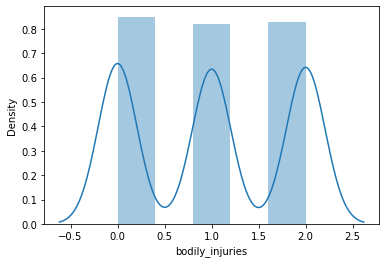

In [82]:
print(data_numerical['bodily_injuries'].value_counts())
sns.distplot(data_numerical['bodily_injuries'])
plt.show()

In [83]:
# follows normal distribution from 0 to 2

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


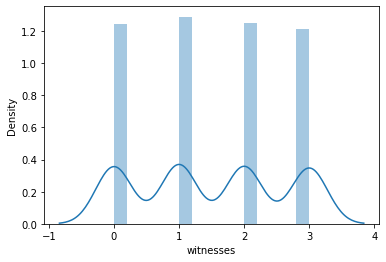

In [84]:
print(data_numerical['witnesses'].value_counts())
sns.distplot(data_numerical['witnesses'])
plt.show()

In [85]:
# the data is scattered from 0 to 4.

59400    5
2640     4
70400    4
4320     4
44200    4
        ..
65250    1
87100    1
6240     1
66600    1
67500    1
Name: total_claim_amount, Length: 763, dtype: int64


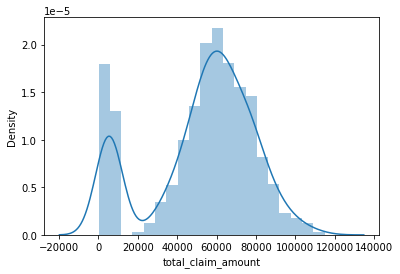

In [86]:
print(data_numerical['total_claim_amount'].value_counts())
sns.distplot(data_numerical['total_claim_amount'])
plt.show()

In [87]:
# follows normal distribution from 20000 to 1,40,000.

0        25
640       7
480       7
660       5
580       5
         ..
14840     1
6580      1
11820     1
16650     1
7500      1
Name: injury_claim, Length: 638, dtype: int64


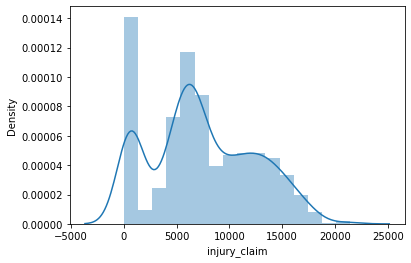

In [88]:
print(data_numerical['injury_claim'].value_counts())
sns.distplot(data_numerical['injury_claim'])
plt.show()

In [89]:
# The column follows normal distribution from 4000 to 20000

0        19
860       6
480       5
660       5
10000     5
         ..
3590      1
6480      1
4580      1
4920      1
7500      1
Name: property_claim, Length: 626, dtype: int64


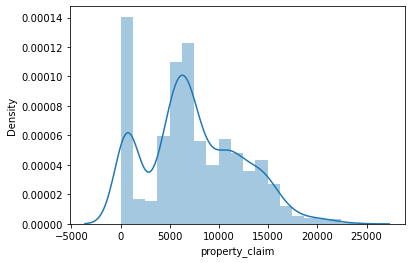

In [90]:
print(data_numerical['property_claim'].value_counts())
sns.distplot(data_numerical['property_claim'])
plt.show()

In [91]:
# the Property claim values also follows normal distribution from 4000 to 22000

5040     7
3360     6
52080    5
4720     5
3600     5
        ..
43360    1
25130    1
38940    1
47430    1
52500    1
Name: vehicle_claim, Length: 726, dtype: int64


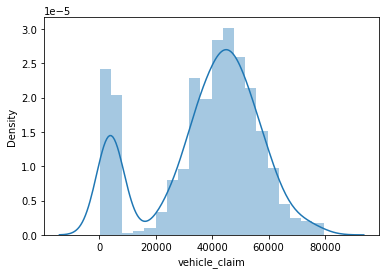

In [92]:
print(data_numerical['vehicle_claim'].value_counts())
sns.distplot(data_numerical['vehicle_claim'])
plt.show()

In [93]:
# follows normaldistribution from 20000 to 80000

In [94]:
data_categorical.columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


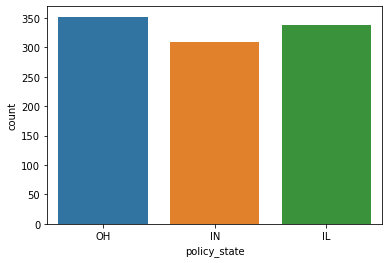

In [95]:
print(data_categorical['policy_state'].value_counts())
sns.countplot(data_categorical['policy_state'])
plt.show()


        

In [96]:
# OH policy state customer is more(352)
# Il policy state is taken by 338 customers.
# IN policystate is taken by 310 customers.

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


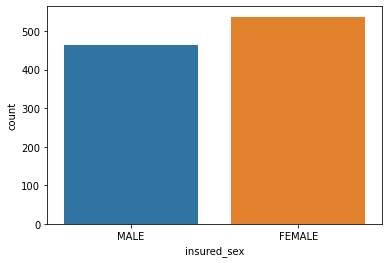

In [97]:
print(data_categorical['insured_sex'].value_counts())
sns.countplot(data_categorical['insured_sex'])
plt.show()

In [98]:
# we have  more female customers who have taken insurance .
# we have less male customers.

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


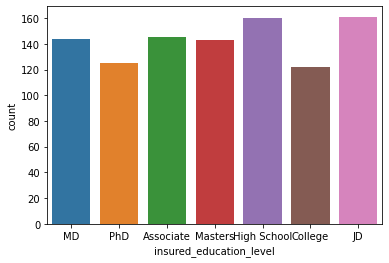

In [99]:
print(data_categorical['insured_education_level'].value_counts())
sns.countplot(data_categorical['insured_education_level'])
plt.show()

In [100]:
# we have more customers(161) whose qualification ids Junior Degree .
# we have less customers (122) whose qualification is given as college.

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


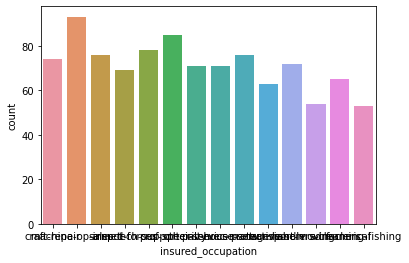

In [101]:
print(data_categorical['insured_occupation'].value_counts())
sns.countplot(data_categorical['insured_occupation'])
plt.show()

In [102]:
# we have more customers whose occupation is machine_op_inspct
# we have less customers whose occupation is farming-fishing

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


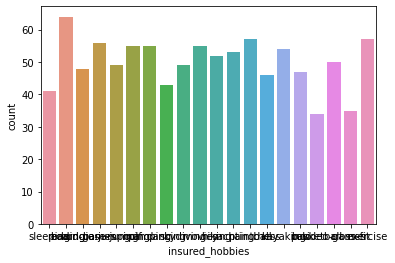

In [103]:
print(data_categorical['insured_hobbies'].value_counts())
sns.countplot(data_categorical['insured_hobbies'])
plt.show()

In [104]:
# Most of the customers having reading habit.

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


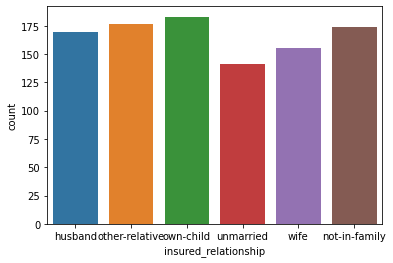

In [105]:
print(data_categorical['insured_relationship'].value_counts())
sns.countplot(data_categorical['insured_relationship'])
plt.show()

In [106]:
# customers with their own child take more insurance.
# customers who are unmarried have taken less insurance 

In [107]:
data_categorical.columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

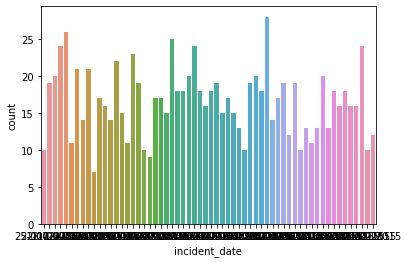

In [108]:
print(data_categorical['incident_date'].value_counts())
sns.countplot(data_categorical['incident_date'])
plt.show()

In [109]:
# we are deleting this column from the dataset.

In [110]:
data.drop(columns=['incident_date'],axis=1,inplace=True)
data_categorical.drop(columns=['incident_date'],axis=1,inplace=True)

In [111]:
data_categorical.columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


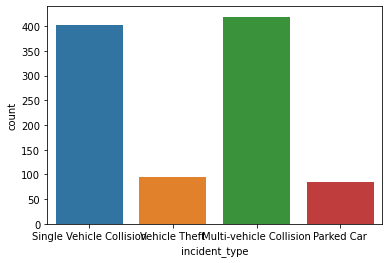

In [112]:
print(data_categorical['incident_type'].value_counts())
sns.countplot(data_categorical['incident_type'])
plt.show()

In [113]:
# we have more insured customers where the incident  had multi vehicle collision.
# we have less insured customers where the incident happened while parking the car

Rear Collision     292
Side Collision     276
Front Collision    254
0                  178
Name: collision_type, dtype: int64


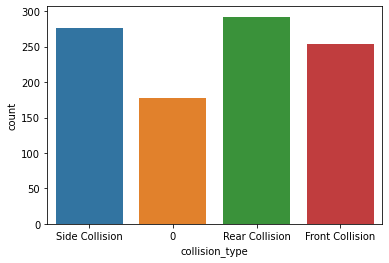

In [114]:
print(data_categorical['collision_type'].value_counts())
sns.countplot(data_categorical['collision_type'])
plt.show()

In [115]:
# we have more customers where they had incident with Rear collision.
# we have less  customers where they had NO collision type

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


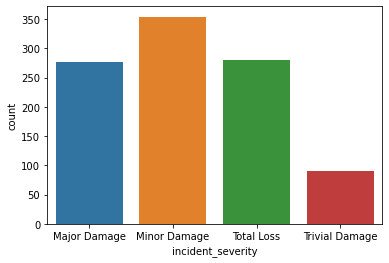

In [116]:
print(data_categorical['incident_severity'].value_counts())
sns.countplot(data_categorical['incident_severity'])
plt.show()

In [117]:
# we had more insurance customers with their incident as MINOR.
# we had less insurance customers with Trivial Damage as their incident.

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


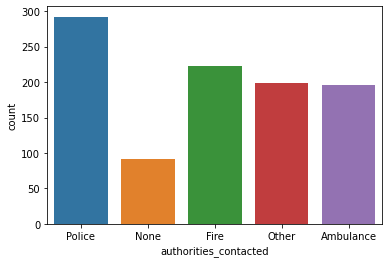

In [118]:
print(data_categorical['authorities_contacted'].value_counts())
sns.countplot(data_categorical['authorities_contacted'])
plt.show()

In [119]:
# we have more insured customers who are contacted by police,less with None.

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


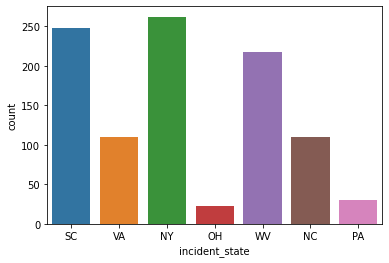

In [120]:
print(data_categorical['incident_state'].value_counts())
sns.countplot(data_categorical['incident_state'])
plt.show()

In [121]:
# we have more customers with NY as their incident state,less with OH

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


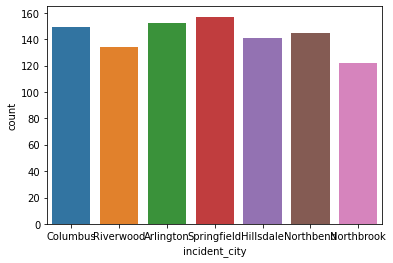

In [122]:
print(data_categorical['incident_city'].value_counts())
sns.countplot(data_categorical['incident_city'])
plt.show()

In [123]:
# we have more insured customers with incident in Springfield.and less in Northbrook.

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64


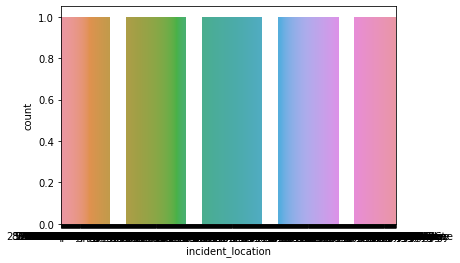

In [124]:
print(data_categorical['incident_location'].value_counts())
sns.countplot(data_categorical['incident_location'])
plt.show()

In [125]:
# since unique values we are deleting the columns incidentlocation and incident state.

In [126]:
data.drop(columns=['incident_state','incident_location'],axis=1,inplace=True)
data_categorical.drop(columns=['incident_state','incident_location'],axis=1,inplace=True)

In [127]:
data_categorical.columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_city', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

0      360
NO     338
YES    302
Name: property_damage, dtype: int64


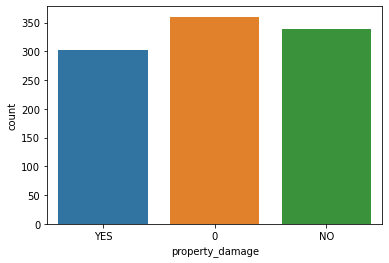

In [128]:
print(data_categorical['property_damage'].value_counts())
sns.countplot(data_categorical['property_damage'])
plt.show()

In [129]:
# we have more insured customers with property_damage(0)

0      343
NO     343
YES    314
Name: police_report_available, dtype: int64


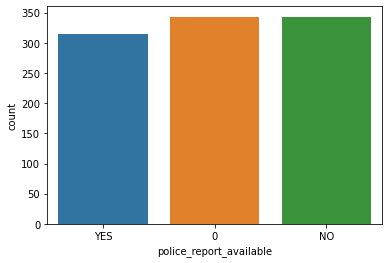

In [130]:
print(data_categorical['police_report_available'].value_counts())
sns.countplot(data_categorical['police_report_available'])
plt.show()

In [131]:
# we have more customers with 'None ' as police_report_available.

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


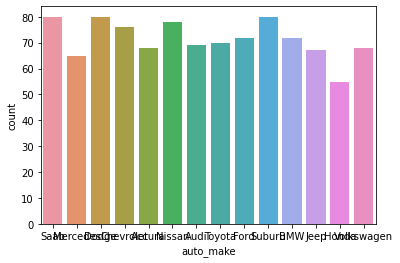

In [132]:
print(data_categorical['auto_make'].value_counts())
sns.countplot(data_categorical['auto_make'])
plt.show()

In [133]:
# w ehave more insured customers with SAAB as their auto make.

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


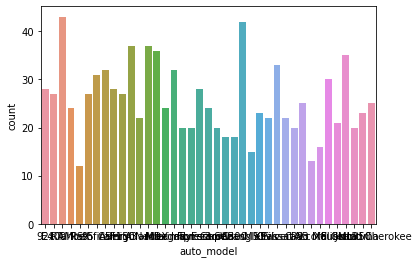

In [134]:
print(data_categorical['auto_model'].value_counts())
sns.countplot(data_categorical['auto_model'])
plt.show()

In [135]:
# deleting this column from the Dataset
data.drop(columns=['auto_model'],axis=1,inplace=True)
data_categorical.drop(columns=['auto_model'],axis=1,inplace=True)

In [136]:
data_categorical.columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_city', 'property_damage',
       'police_report_available', 'auto_make', 'fraud_reported'],
      dtype='object')

N    753
Y    247
Name: fraud_reported, dtype: int64


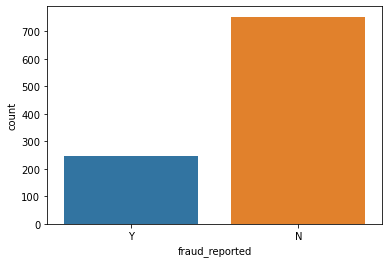

In [137]:
#analyzing the Targetcolumn:
print(data_categorical['fraud_reported'].value_counts())
sns.countplot(data_categorical['fraud_reported'])
plt.show()

In [138]:
# we have more customers with N for the insurance claims.

In [139]:
data['fraud_reported']=data['fraud_reported'].replace('Y',1)
data['fraud_reported']=data['fraud_reported'].replace('N',0)

In [140]:
data['fraud_reported']

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [141]:
data.shape

(1000, 31)

In [142]:
# after deleting the columns,the dataset shape is 1000 rows and 31 columns.

# Bivariate Analysis

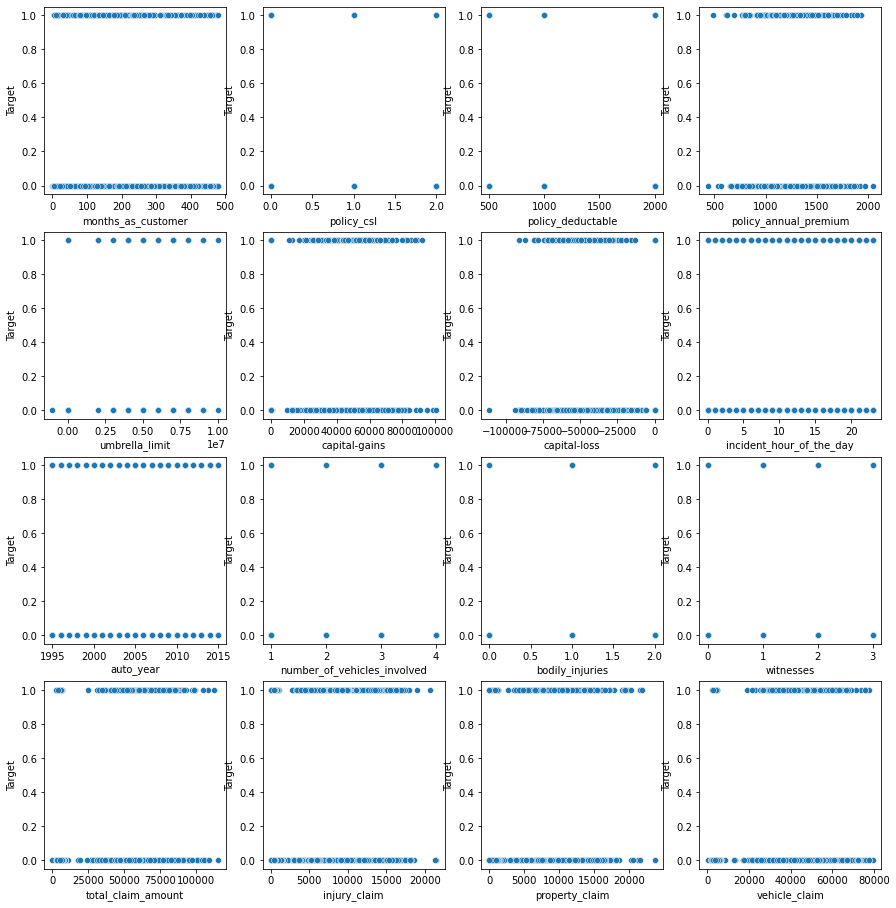

In [143]:
# Numerical columns with Target.
plt.figure(figsize=(15,20))
pltno=1
for columns in data_numerical:
    if pltno<=20:
        ax=plt.subplot(5,4,pltno)
        sns.scatterplot(x=data_numerical[columns],y=data['fraud_reported'])
        plt.xlabel(columns)
        plt.ylabel('Target')
    pltno+=1
plt.show()

In [144]:
#I can see increase in trend in month as customer,policy_annual_premium,capital_gains,incident_hour of the day,
# total claim amount,injury_claim,property_claim,vehicle_Claim.
# I can see decrease in trend like 'capital loss'

In [145]:
# Categorical columns with Target.

In [146]:
data_categorical.columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_city', 'property_damage',
       'police_report_available', 'auto_make', 'fraud_reported'],
      dtype='object')

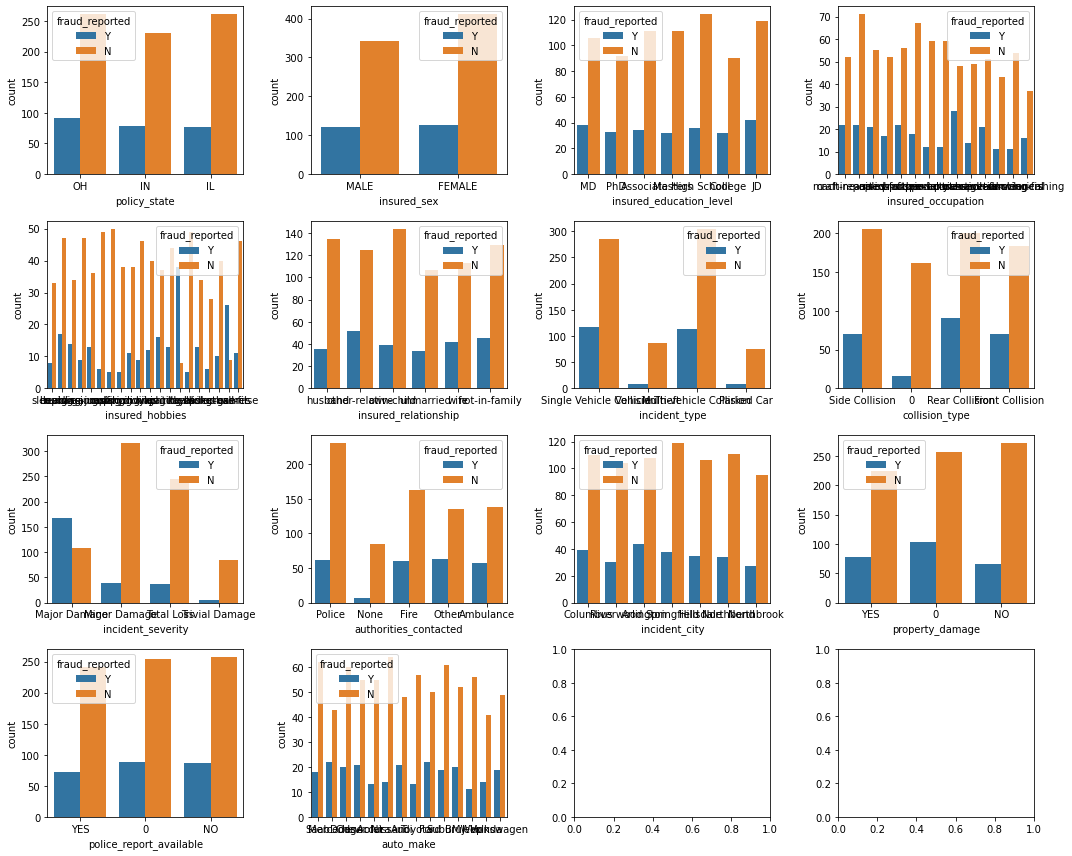

In [147]:
fig,axes=plt.subplots(4,4,figsize=(15,12))

sns.countplot('policy_state',hue="fraud_reported", data= data_categorical, ax=axes[0,0])
sns.countplot('insured_sex',hue="fraud_reported", data= data_categorical, ax=axes[0,1] )
sns.countplot('insured_education_level',hue="fraud_reported", data= data_categorical, ax=axes[0,2] )
sns.countplot('insured_occupation',hue="fraud_reported", data= data_categorical, ax=axes[0,3] )
sns.countplot('insured_hobbies',hue="fraud_reported", data= data_categorical, ax=axes[1,0])
sns.countplot('insured_relationship',hue="fraud_reported", data= data_categorical, ax=axes[1,1])
sns.countplot('incident_type',hue="fraud_reported", data= data_categorical, ax=axes[1,2] )
sns.countplot('collision_type',hue="fraud_reported", data= data_categorical, ax=axes[1,3] )
sns.countplot('incident_severity',hue="fraud_reported", data= data_categorical, ax=axes[2,0])
sns.countplot('authorities_contacted',hue="fraud_reported", data= data_categorical, ax=axes[2,1])
sns.countplot('incident_city',hue="fraud_reported", data= data_categorical, ax=axes[2,2] )
sns.countplot('property_damage',hue="fraud_reported", data= data_categorical, ax=axes[2,3] )
sns.countplot('police_report_available',hue="fraud_reported", data= data_categorical, ax=axes[3,0])
sns.countplot('auto_make',hue="fraud_reported", data= data_categorical, ax=axes[3,1])
plt.tight_layout()
plt.show()

In [148]:
# The Oh policy state is having more fraudlent insurance yes.
# Female customers have more fraudlent insurance claim
# None collision have less fraudlent insurance
# Trivial damage have less fraudlent insurance.
# police authorites contracted have more No to fraudlent Insurance.
#Major Damage incident have reported more yes for farudlent insurance.


# Multivariate Analysis

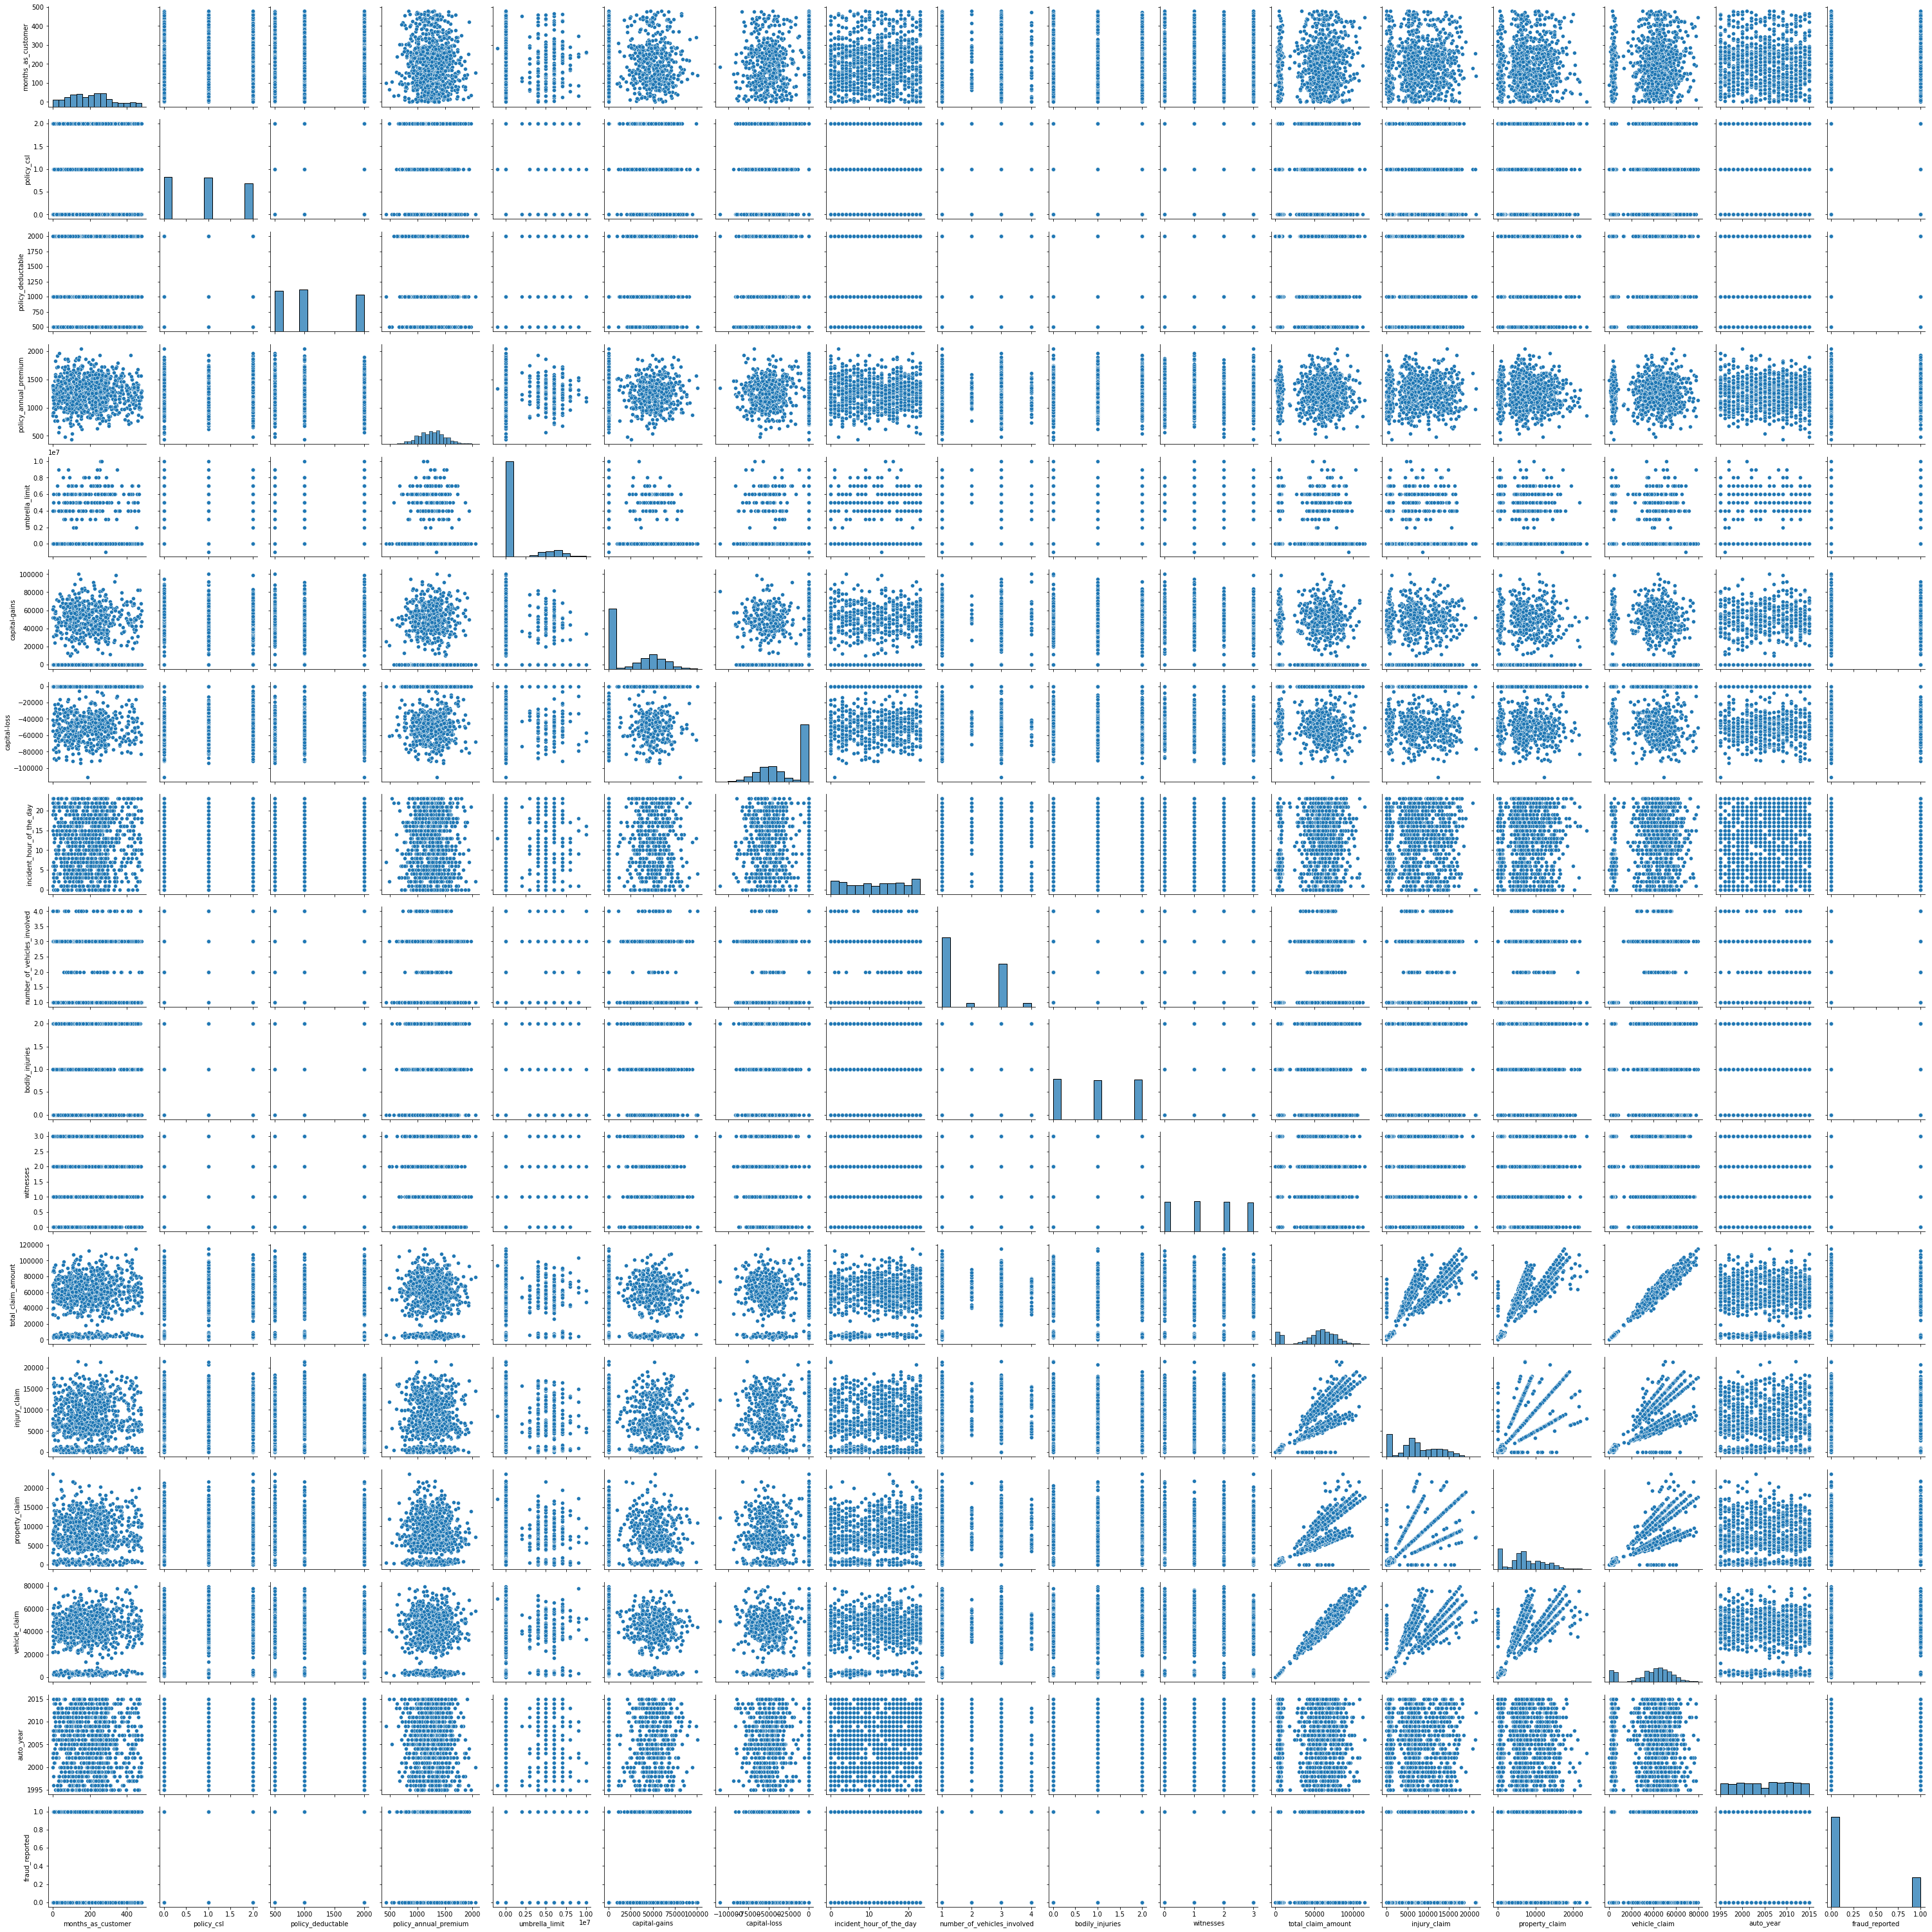

In [149]:
sns.pairplot(data)

# Encoding categorical columns

In [150]:

data_categorical.columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_city', 'property_damage',
       'police_report_available', 'auto_make', 'fraud_reported'],
      dtype='object')

In [151]:
from sklearn.preprocessing import LabelEncoder

In [152]:
le=LabelEncoder()

In [153]:
le_ps=le.fit_transform(data_categorical['policy_state'])
le_ps

array([2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2,
       0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0,
       0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1,
       2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2,
       2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 0, 1,
       1, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0,
       2, 0, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 0, 0, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 2, 2, 2, 0,
       1, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,

In [154]:
data_categorical['policy_state']=le_ps

In [155]:
le_se=le.fit_transform(data_categorical['insured_sex'])
le_se
                                        

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [156]:
data_categorical['insured_sex']=le_se

In [157]:
le_el=le.fit_transform(data_categorical['insured_education_level'])
le_el

array([4, 4, 6, 6, 0, 6, 6, 0, 6, 6, 5, 2, 4, 4, 1, 4, 1, 2, 4, 2, 3, 0,
       2, 4, 1, 5, 2, 3, 3, 6, 5, 3, 0, 2, 6, 2, 5, 3, 4, 3, 0, 0, 1, 6,
       3, 4, 0, 1, 6, 5, 4, 3, 1, 3, 6, 6, 6, 5, 6, 4, 6, 3, 2, 3, 6, 4,
       2, 0, 4, 4, 0, 4, 0, 1, 0, 2, 1, 1, 3, 6, 2, 5, 5, 2, 5, 2, 0, 4,
       1, 1, 2, 0, 6, 4, 2, 6, 0, 5, 1, 1, 1, 1, 3, 0, 1, 1, 0, 2, 6, 5,
       1, 6, 2, 4, 0, 4, 6, 2, 6, 0, 2, 4, 5, 1, 3, 3, 4, 2, 1, 5, 3, 5,
       5, 2, 6, 1, 2, 6, 2, 4, 5, 5, 6, 4, 3, 0, 5, 4, 6, 3, 6, 5, 2, 5,
       5, 0, 3, 3, 5, 3, 0, 4, 4, 5, 5, 6, 0, 2, 5, 2, 0, 2, 1, 4, 6, 4,
       5, 6, 5, 4, 0, 5, 5, 3, 5, 3, 3, 3, 2, 2, 0, 3, 4, 2, 4, 2, 4, 4,
       5, 1, 6, 6, 2, 6, 3, 5, 1, 5, 3, 0, 2, 2, 2, 4, 3, 6, 2, 5, 4, 1,
       1, 1, 2, 0, 0, 5, 2, 0, 4, 4, 2, 3, 5, 4, 3, 5, 3, 4, 0, 5, 4, 1,
       3, 1, 0, 0, 3, 3, 5, 2, 0, 4, 2, 6, 3, 2, 0, 0, 4, 6, 5, 6, 1, 5,
       4, 2, 3, 3, 0, 0, 1, 0, 4, 3, 5, 0, 0, 6, 3, 1, 3, 0, 6, 6, 4, 2,
       3, 0, 3, 1, 0, 1, 2, 2, 2, 0, 1, 1, 4, 2, 5,

In [158]:
data_categorical['insured_education_level']=le_el

In [159]:
data_categorical['insured_occupation']=le.fit_transform(data_categorical['insured_occupation'])

In [160]:
data_categorical['insured_hobbies']=le.fit_transform(data_categorical['insured_hobbies'])

In [161]:
data_categorical['insured_relationship']=le.fit_transform(data_categorical['insured_relationship'])

In [162]:
data_categorical['incident_type']=le.fit_transform(data_categorical['incident_type'])

In [163]:
data_categorical['collision_type']=le.fit_transform(data_categorical['collision_type'])

In [164]:
data_categorical['incident_severity']=le.fit_transform(data_categorical['incident_severity'])

In [165]:
data_categorical['authorities_contacted']=le.fit_transform(data_categorical['authorities_contacted'])

In [166]:
data_categorical['incident_city']=le.fit_transform(data_categorical['incident_city'])

In [167]:
data_categorical['property_damage']=data_categorical['property_damage'].astype('str')
data_categorical['property_damage']=le.fit_transform(data_categorical['property_damage'])

In [168]:
data_categorical['police_report_available']=data_categorical['police_report_available'].astype('str')
data_categorical['police_report_available']=le.fit_transform(data_categorical['police_report_available'])

In [169]:
data_categorical['auto_make']=le.fit_transform(data_categorical['auto_make'])

In [170]:
data_categorical # encoded all the columns.

policy_state  insured_sex  insured_education_level  insured_occupation  \
0               2            1                        4                   2   
1               1            1                        4                   6   
2               2            0                        6                  11   
3               0            0                        6                   1   
4               0            1                        0                  11   
..            ...          ...                      ...                 ...   
995             2            0                        5                   2   
996             0            0                        6                   9   
997             2            0                        5                   1   
998             0            1                        0                   5   
999             2            0                        0                  11   

     insured_hobbies  insured_relationship  incident_type  collision_type  \
0                 17                     0              2               3   
1                 15                     2              3               0   
2                  2                     3              0               2   
3                  2                     4              2               1   
4                  2                     4              3               0   
..               ...                   ...            ...             ...   
995               13                     4              2               1   
996               17                     5              2               2   
997                3                     2              0               3   
998                0                     5              2               2   
999               11                     0              1               0   

     incident_severity  authorities_contacted  incident_city  property_damage  \
0                    0                      4              1                2   
1                    1                      4              5                0   
2                    1                      4              1                1   
3                    0                      4              0                0   
4                    1                      2              0                1   
..                 ...                    ...            ...              ...   
995                  1                      1              4                2   
996                  0                      1              3                2   
997                  1                      4              0                0   
998                  0                      3              0                0   
999                  1                      4              1                0   

     police_report_available  auto_make fraud_reported  
0                          2         10              Y  
1                          0          8              Y  
2                          1          4              N  
3                          1          3              Y  
4                          1          0              N  
..                       ...        ...            ...  
995                        0          6              N  
996                        0         13              N  
997                        2         11              N  
998                        2          1              N  
999                        0          8              N  

[1000 rows x 15 columns]

In [171]:
data_categorical.drop(columns=['fraud_reported'],axis=1,inplace=True)

In [172]:
# dropping all the categorical columns
data.drop(columns=['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_city', 'property_damage',
       'police_report_available', 'auto_make'],axis=1,inplace=True)

In [173]:
data

months_as_customer  policy_csl  policy_deductable  policy_annual_premium  \
0                   328           0               1000                1406.91   
1                   228           0               2000                1197.22   
2                   134           1               2000                1413.14   
3                   256           0               2000                1415.74   
4                   228           2               1000                1583.91   
..                  ...         ...                ...                    ...   
995                   3           2               1000                1310.80   
996                 285           1               1000                1436.79   
997                 130           0                500                1383.49   
998                 458           2               2000                1356.92   
999                 456           0               1000                 766.19   

     umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  \
0                 0          53300             0                         5   
1           5000000              0             0                         8   
2           5000000          35100             0                         7   
3           6000000          48900        -62400                         5   
4           6000000          66000        -46000                        20   
..              ...            ...           ...                       ...   
995               0              0             0                        20   
996               0          70900             0                        23   
997         3000000          35100             0                         4   
998         5000000              0             0                         2   
999               0              0             0                         6   

     number_of_vehicles_involved  bodily_injuries  witnesses  \
0                              1                1          2   
1                              1                0          0   
2                              3                2          3   
3                              1                1          2   
4                              1                0          1   
..                           ...              ...        ...   
995                            1                0          1   
996                            1                2          3   
997                            3                2          3   
998                            1                0          1   
999                            1                0          3   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
995               87200         17440            8720          61040   
996              108480         18080           18080          72320   
997               67500          7500            7500          52500   
998               46980          5220            5220          36540   
999                5060           460             920           3680   

     auto_year  fraud_reported  
0         2004               1  
1         2007               1  
2         2007               0  
3         2014               1  
4         2009               0  
..         ...             ...  
995       2006               0  
996       2015               0  
997       1996               0  
998       1998               0  
999       2007               0  

[1000 rows x 17 columns]

In [174]:
#joining the data and the encoded columns.
data1=pd.concat([data,data_categorical],axis=1)
data1

months_as_customer  policy_csl  policy_deductable  policy_annual_premium  \
0                   328           0               1000                1406.91   
1                   228           0               2000                1197.22   
2                   134           1               2000                1413.14   
3                   256           0               2000                1415.74   
4                   228           2               1000                1583.91   
..                  ...         ...                ...                    ...   
995                   3           2               1000                1310.80   
996                 285           1               1000                1436.79   
997                 130           0                500                1383.49   
998                 458           2               2000                1356.92   
999                 456           0               1000                 766.19   

     umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  \
0                 0          53300             0                         5   
1           5000000              0             0                         8   
2           5000000          35100             0                         7   
3           6000000          48900        -62400                         5   
4           6000000          66000        -46000                        20   
..              ...            ...           ...                       ...   
995               0              0             0                        20   
996               0          70900             0                        23   
997         3000000          35100             0                         4   
998         5000000              0             0                         2   
999               0              0             0                         6   

     number_of_vehicles_involved  bodily_injuries  ...  insured_hobbies  \
0                              1                1  ...               17   
1                              1                0  ...               15   
2                              3                2  ...                2   
3                              1                1  ...                2   
4                              1                0  ...                2   
..                           ...              ...  ...              ...   
995                            1                0  ...               13   
996                            1                2  ...               17   
997                            3                2  ...                3   
998                            1                0  ...                0   
999                            1                0  ...               11   

     insured_relationship  incident_type  collision_type  incident_severity  \
0                       0              2               3                  0   
1                       2              3               0                  1   
2                       3              0               2                  1   
3                       4              2               1                  0   
4                       4              3               0                  1   
..                    ...            ...             ...                ...   
995                     4              2               1                  1   
996                     5              2               2                  0   
997                     2              0               3                  1   
998                     5              2               2                  0   
999                     0              1               0                  1   

     authorities_contacted  incident_city  property_damage  \
0                        4              1                2   
1                        4              5                0   
2                        4              1                1 

In [175]:
data1.columns

Index(['months_as_customer', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported', 'policy_state', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make'],
      dtype='object')

# correlation

In [176]:
corr=data1.corr()

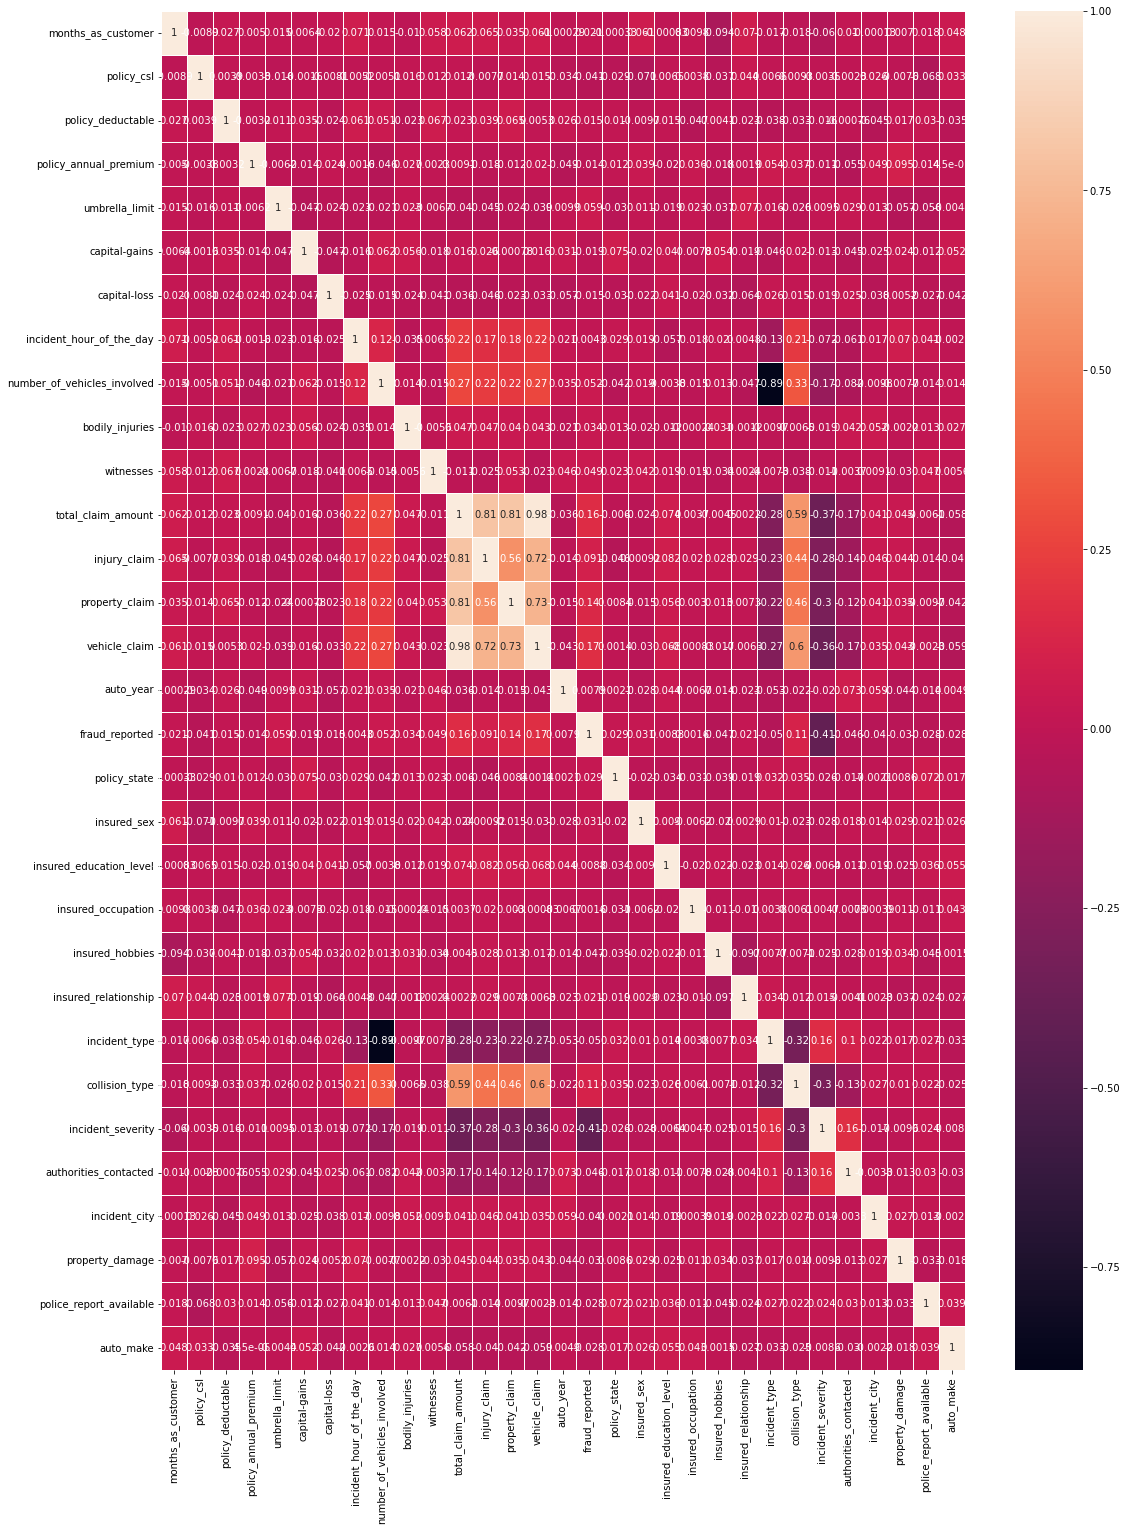

In [177]:
plt.figure(figsize=(18,25))
sns.heatmap(data=corr,annot=True,linewidths=1.0)
plt.show()

In [178]:
corr['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
policy_deductable              0.014817
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
policy_annual_premium         -0.014480
capital-loss                  -0.014863
capital-gains                 -0.019173
auto_make                     -0.027519
police_report_available       -0.028159
property_damage               -0.030497


In [179]:
delete_columns=pd.DataFrame()
delete_columns['columnname']=['injury_claim','umbrella_limit','number_of_vehicles_involved','witnesses','bodily_injuries','insured_sex','policy_state',
              'insured_relationship','months_as_customer','policy_deductable','insured_education_level ','auto_year','policy_annual_premium',
              'capital-loss','capital-gains','incident_hour_of_the_day']
delete_columns['corelation_value']=[0.09,0.05,0.05,0.04,0.03,0.03,0.02,0.02,0.02,0.01,0.00,0.00,-0.01,-0.01,-0.01,0.00]
delete_columns

columnname  corelation_value
0                  injury_claim              0.09
1                umbrella_limit              0.05
2   number_of_vehicles_involved              0.05
3                     witnesses              0.04
4               bodily_injuries              0.03
5                   insured_sex              0.03
6                  policy_state              0.02
7          insured_relationship              0.02
8            months_as_customer              0.02
9             policy_deductable              0.01
10     insured_education_level               0.00
11                    auto_year              0.00
12        policy_annual_premium             -0.01
13                 capital-loss             -0.01
14                capital-gains             -0.01
15     incident_hour_of_the_day              0.00

In [180]:
data1.columns

Index(['months_as_customer', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported', 'policy_state', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make'],
      dtype='object')

In [181]:
data1.drop(columns=['injury_claim','umbrella_limit','number_of_vehicles_involved','witnesses','bodily_injuries','insured_sex','policy_state','insured_relationship','months_as_customer','policy_deductable','insured_education_level','auto_year','policy_annual_premium','capital-loss','capital-gains','incident_hour_of_the_day'],axis=1,inplace=True)
data1

policy_csl  total_claim_amount  property_claim  vehicle_claim  \
0             0               71610           13020          52080   
1             0                5070             780           3510   
2             1               34650            3850          23100   
3             0               63400            6340          50720   
4             2                6500             650           4550   
..          ...                 ...             ...            ...   
995           2               87200            8720          61040   
996           1              108480           18080          72320   
997           0               67500            7500          52500   
998           2               46980            5220          36540   
999           0                5060             920           3680   

     fraud_reported  insured_occupation  insured_hobbies  incident_type  \
0                 1                   2               17              2   
1                 1                   6               15              3   
2                 0                  11                2              0   
3                 1                   1                2              2   
4                 0                  11                2              3   
..              ...                 ...              ...            ...   
995               0                   2               13              2   
996               0                   9               17              2   
997               0                   1                3              0   
998               0                   5                0              2   
999               0                  11               11              1   

     collision_type  incident_severity  authorities_contacted  incident_city  \
0                 3                  0                      4              1   
1                 0                  1                      4              5   
2                 2                  1                      4              1   
3                 1                  0                      4              0   
4                 0                  1                      2              0   
..              ...                ...                    ...            ...   
995               1                  1                      1              4   
996               2                  0                      1              3   
997               3                  1                      4              0   
998               2                  0                      3              0   
999               0                  1                      4              1   

     property_damage  police_report_available  auto_make  
0                  2                        2         10  
1                  0                        0          8  
2                  1                        1          4  
3                  0                        1          3  
4                  1                        1          0  
..               ...                      ...        ...  
995                2                        0          6  
996                2                        0         13  
997                0                        2         11  
998                0                        2          1  
999                0                        0          8  

[1000 rows x 15 columns]

In [182]:
# after deleting the columns,now the shape of the Dataset is 1000 rows and 15 columns.

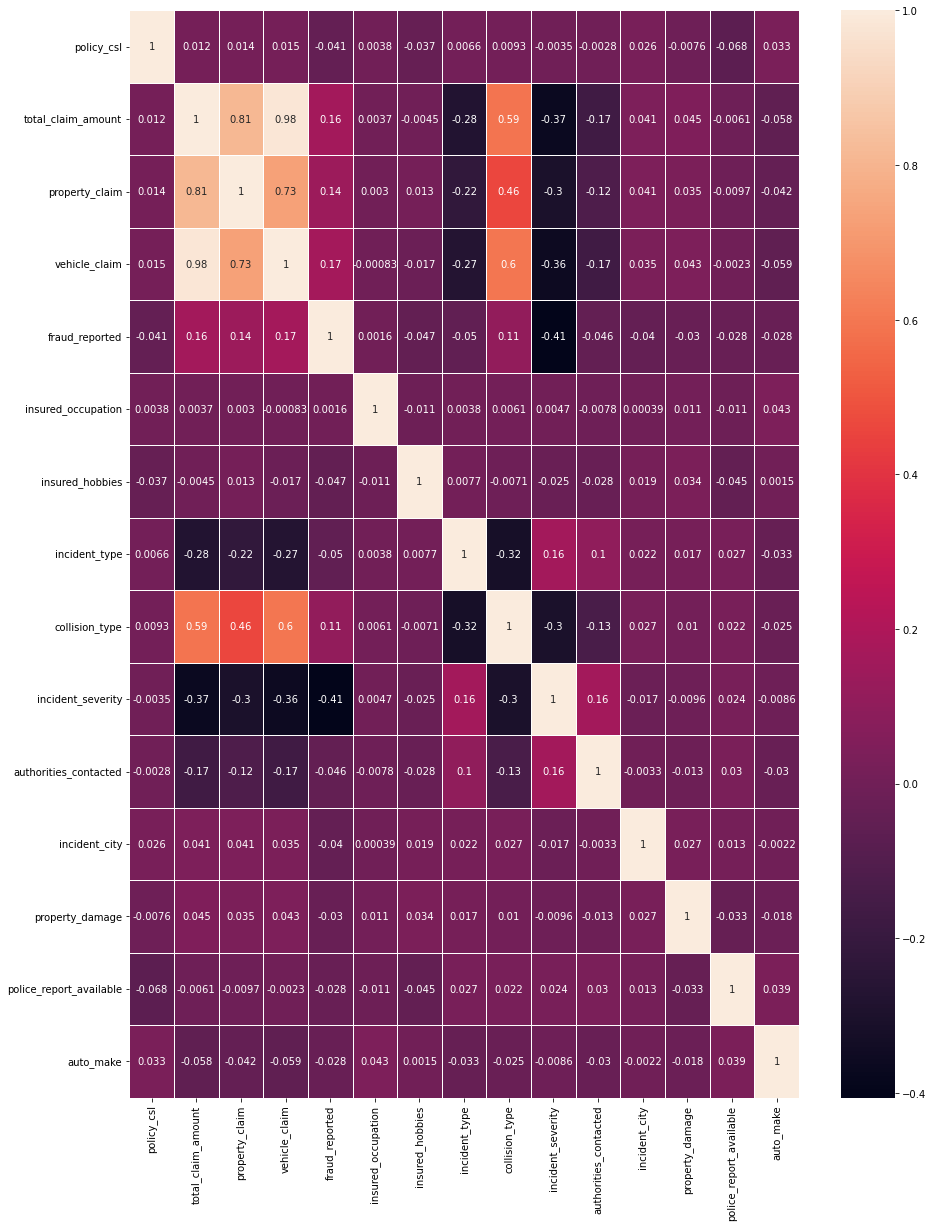

In [183]:
corr1=data1.corr()
plt.figure(figsize=(15,20))
sns.heatmap(data=corr1,annot=True,linewidths=0.5)
plt.show()

In [184]:
corr1['fraud_reported'].sort_values(ascending=False)

fraud_reported             1.000000
vehicle_claim              0.170049
total_claim_amount         0.163651
property_claim             0.137835
collision_type             0.110130
insured_occupation         0.001564
auto_make                 -0.027519
police_report_available   -0.028159
property_damage           -0.030497
incident_city             -0.040403
policy_csl                -0.041475
authorities_contacted     -0.045802
insured_hobbies           -0.046838
incident_type             -0.050376
incident_severity         -0.405988
Name: fraud_reported, dtype: float64

In [185]:
# still multicollinearity issues are there between 'property claim'and 'Total claim amount'and vechicle claim
# still analyze further with VIF.

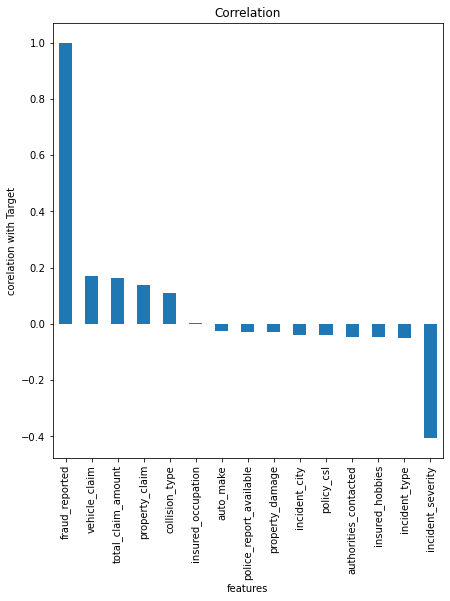

In [186]:
plt.figure(figsize=(7,8))
corr1['fraud_reported'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('corelation with Target')
plt.title('Correlation')
plt.show()

# Selecting best Features using Kbest method.

In [187]:
# To Select the Best Features Using SelectK Best Method.
from sklearn.feature_selection import SelectKBest, f_classif

In [188]:
data1['fraud_reported']=data['fraud_reported']
data1

policy_csl  total_claim_amount  property_claim  vehicle_claim  \
0             0               71610           13020          52080   
1             0                5070             780           3510   
2             1               34650            3850          23100   
3             0               63400            6340          50720   
4             2                6500             650           4550   
..          ...                 ...             ...            ...   
995           2               87200            8720          61040   
996           1              108480           18080          72320   
997           0               67500            7500          52500   
998           2               46980            5220          36540   
999           0                5060             920           3680   

     fraud_reported  insured_occupation  insured_hobbies  incident_type  \
0                 1                   2               17              2   
1                 1                   6               15              3   
2                 0                  11                2              0   
3                 1                   1                2              2   
4                 0                  11                2              3   
..              ...                 ...              ...            ...   
995               0                   2               13              2   
996               0                   9               17              2   
997               0                   1                3              0   
998               0                   5                0              2   
999               0                  11               11              1   

     collision_type  incident_severity  authorities_contacted  incident_city  \
0                 3                  0                      4              1   
1                 0                  1                      4              5   
2                 2                  1                      4              1   
3                 1                  0                      4              0   
4                 0                  1                      2              0   
..              ...                ...                    ...            ...   
995               1                  1                      1              4   
996               2                  0                      1              3   
997               3                  1                      4              0   
998               2                  0                      3              0   
999               0                  1                      4              1   

     property_damage  police_report_available  auto_make  
0                  2                        2         10  
1                  0                        0          8  
2                  1                        1          4  
3                  0                        1          3  
4                  1                        1          0  
..               ...                      ...        ...  
995                2                        0          6  
996                2                        0         13  
997                0                        2         11  
998                0                        2          1  
999                0                        0          8  

[1000 rows x 15 columns]

In [189]:
x=data1.drop(columns=['fraud_reported'],axis=1)
x

policy_csl  total_claim_amount  property_claim  vehicle_claim  \
0             0               71610           13020          52080   
1             0                5070             780           3510   
2             1               34650            3850          23100   
3             0               63400            6340          50720   
4             2                6500             650           4550   
..          ...                 ...             ...            ...   
995           2               87200            8720          61040   
996           1              108480           18080          72320   
997           0               67500            7500          52500   
998           2               46980            5220          36540   
999           0                5060             920           3680   

     insured_occupation  insured_hobbies  incident_type  collision_type  \
0                     2               17              2               3   
1                     6               15              3               0   
2                    11                2              0               2   
3                     1                2              2               1   
4                    11                2              3               0   
..                  ...              ...            ...             ...   
995                   2               13              2               1   
996                   9               17              2               2   
997                   1                3              0               3   
998                   5                0              2               2   
999                  11               11              1               0   

     incident_severity  authorities_contacted  incident_city  property_damage  \
0                    0                      4              1                2   
1                    1                      4              5                0   
2                    1                      4              1                1   
3                    0                      4              0                0   
4                    1                      2              0                1   
..                 ...                    ...            ...              ...   
995                  1                      1              4                2   
996                  0                      1              3                2   
997                  1                      4              0                0   
998                  0                      3              0                0   
999                  1                      4              1                0   

     police_report_available  auto_make  
0                          2         10  
1                          0          8  
2                          1          4  
3                          1          3  
4                          1          0  
..                       ...        ...  
995                        0          6  
996                        0         13  
997                        2         11  
998                        2          1  
999                        0          8  

[1000 rows x 14 columns]

In [190]:
y=data1['fraud_reported']
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [191]:
best_feature=SelectKBest(score_func=f_classif,k='all')
fit=best_feature.fit(x,y)
score=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(x.columns)
best_score=pd.concat([score,columns],axis=1)
best_score.columns=['score','columnname']
best_score

score               columnname
0     1.719689               policy_csl
1    27.463776       total_claim_amount
2    19.327729           property_claim
3    29.718214            vehicle_claim
4     0.002440       insured_occupation
5     2.194239          insured_hobbies
6     2.539153            incident_type
7    12.252860           collision_type
8   196.960603        incident_severity
9     2.098018    authorities_contacted
10    1.631761            incident_city
11    0.929077          property_damage
12    0.791953  police_report_available
13    0.756354                auto_make

In [192]:
best_score.sort_values('score',ascending=False)

score               columnname
8   196.960603        incident_severity
3    29.718214            vehicle_claim
1    27.463776       total_claim_amount
2    19.327729           property_claim
7    12.252860           collision_type
6     2.539153            incident_type
5     2.194239          insured_hobbies
9     2.098018    authorities_contacted
0     1.719689               policy_csl
10    1.631761            incident_city
11    0.929077          property_damage
12    0.791953  police_report_available
13    0.756354                auto_make
4     0.002440       insured_occupation

In [193]:
# after Analyzing the Best Feature scores,deleting the columns['incident_type','insured_hobbies','authorities_contacted','policy_csl',
#'incident_city',property_damage','police_report_available','auto_make','insured_occupation'] from the Dataset.

In [194]:
data1.drop(columns=['incident_type','insured_hobbies','authorities_contacted','policy_csl','incident_city','property_damage','police_report_available','auto_make','insured_occupation'],axis=1,inplace=True)
data1

total_claim_amount  property_claim  vehicle_claim  fraud_reported  \
0                 71610           13020          52080               1   
1                  5070             780           3510               1   
2                 34650            3850          23100               0   
3                 63400            6340          50720               1   
4                  6500             650           4550               0   
..                  ...             ...            ...             ...   
995               87200            8720          61040               0   
996              108480           18080          72320               0   
997               67500            7500          52500               0   
998               46980            5220          36540               0   
999                5060             920           3680               0   

     collision_type  incident_severity  
0                 3                  0  
1                 0                  1  
2                 2                  1  
3                 1                  0  
4                 0                  1  
..              ...                ...  
995               1                  1  
996               2                  0  
997               3                  1  
998               2                  0  
999               0                  1  

[1000 rows x 6 columns]

# Outliers Detection and removal

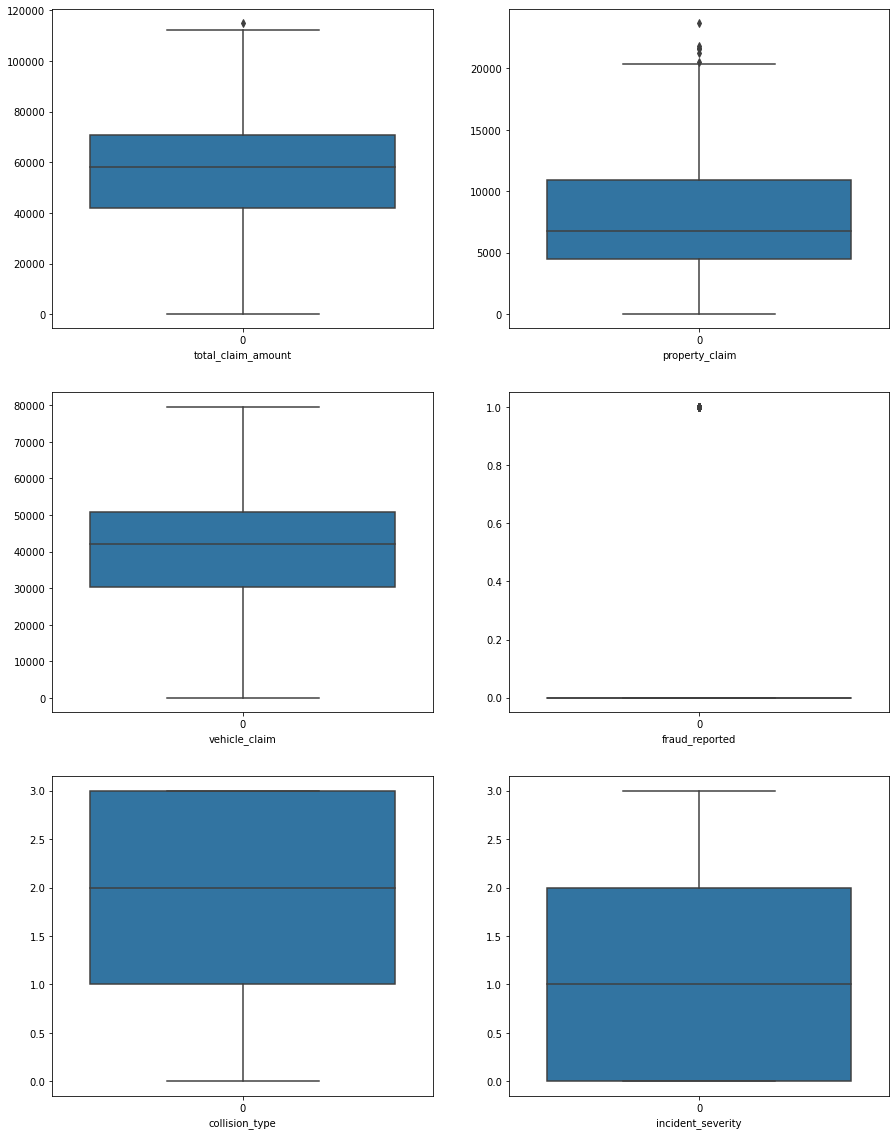

In [195]:
# seeing the outliers using boxplot.
plt.figure(figsize=(15,20))
plotnumber=1
for columns in data1:
    if plotnumber<=6:
        plt.subplot(3,2,plotnumber)
        ax=sns.boxplot(data=data1[columns])
        plt.xlabel(columns)
    plotnumber+=1
plt.show()

In [196]:
from scipy.stats import zscore

In [197]:
z=np.abs(zscore(data1))
z

total_claim_amount  property_claim  vehicle_claim  fraud_reported  \
0              0.714257        1.165505       0.749653        1.746019   
1              1.807312        1.372696       1.823346        1.746019   
2              0.686362        0.736072       0.785565        0.572731   
3              0.403135        0.219722       0.677607        1.746019   
4              1.753121        1.399654       1.768252        0.572731   
..                  ...             ...            ...             ...   
995            1.305049        0.273817       1.224309        0.572731   
996            2.111466        2.214794       1.821868        0.572731   
997            0.558507        0.020826       0.771902        0.572731   
998            0.219110        0.451976       0.073580        0.572731   
999            1.807691        1.343664       1.814340        0.572731   

     collision_type  incident_severity  
0          1.254675           1.260614  
1          1.566933           0.195906  
2          0.314139           0.195906  
3          0.626397           1.260614  
4          1.566933           0.195906  
..              ...                ...  
995        0.626397           0.195906  
996        0.314139           1.260614  
997        1.254675           0.195906  
998        0.314139           1.260614  
999        1.566933           0.195906  

[1000 rows x 6 columns]

In [198]:
data_new=data1[(z<3).all(axis=1)]
data_new

total_claim_amount  property_claim  vehicle_claim  fraud_reported  \
0                 71610           13020          52080               1   
1                  5070             780           3510               1   
2                 34650            3850          23100               0   
3                 63400            6340          50720               1   
4                  6500             650           4550               0   
..                  ...             ...            ...             ...   
995               87200            8720          61040               0   
996              108480           18080          72320               0   
997               67500            7500          52500               0   
998               46980            5220          36540               0   
999                5060             920           3680               0   

     collision_type  incident_severity  
0                 3                  0  
1                 0                  1  
2                 2                  1  
3                 1                  0  
4                 0                  1  
..              ...                ...  
995               1                  1  
996               2                  0  
997               3                  1  
998               2                  0  
999               0                  1  

[999 rows x 6 columns]

In [199]:
# only one row is deleted with zscore method,not much outliers presentin the Dataset.

# skewness

In [200]:
data_new.skew()

total_claim_amount   -0.594045
property_claim        0.355621
vehicle_claim        -0.619587
fraud_reported        1.173510
collision_type       -0.191913
incident_severity     0.278312
dtype: float64

In [201]:
from sklearn.preprocessing import PowerTransformer

In [202]:
# applying powerTransformer
pt=PowerTransformer()
pwr=pt.fit_transform(data_new)
data_pwr=pd.DataFrame(data=pwr,columns=data_new.columns)
data_pwr

total_claim_amount  property_claim  vehicle_claim  fraud_reported  \
0              0.717302        1.087829       0.754540        1.744859   
1             -1.776486       -1.558102      -1.785998        1.744859   
2             -0.715614       -0.577982      -0.819516       -0.573112   
3              0.392961       -0.033756       0.678496        1.744859   
4             -1.729255       -1.622652      -1.739320       -0.573112   
..                  ...             ...            ...             ...   
994            1.340479        0.406017       1.259647       -0.573112   
995            2.204113        1.777047       1.904626       -0.573112   
996            0.554575        0.187941       0.778059       -0.573112   
997           -0.246140       -0.264705      -0.102977       -0.573112   
998           -1.776813       -1.493470      -1.778441       -0.573112   

     collision_type  incident_severity  
0          1.252276          -1.370049  
1         -1.572315          -0.067553  
2          0.319245          -0.067553  
3         -0.620958          -1.370049  
4         -1.572315          -0.067553  
..              ...                ...  
994       -0.620958          -0.067553  
995        0.319245          -1.370049  
996        1.252276          -0.067553  
997        0.319245          -1.370049  
998       -1.572315          -0.067553  

[999 rows x 6 columns]

In [203]:
data_pwr.skew()

total_claim_amount   -0.510234
property_claim       -0.363765
vehicle_claim        -0.522265
fraud_reported        1.173510
collision_type       -0.203669
incident_severity    -0.079445
dtype: float64

In [204]:
# Not much difference after applying power Transformer

In [205]:
from sklearn.preprocessing import QuantileTransformer

In [206]:
# applying quantile Transformer Techniques.
qt=QuantileTransformer()
qua=qt.fit_transform(data_new)
data_qua=pd.DataFrame(data=qua,columns=data_new.columns)
data_qua

total_claim_amount  property_claim  vehicle_claim  fraud_reported  \
0              0.767535        0.855711       0.782064             1.0   
1              0.076152        0.120741       0.066132             1.0   
2              0.208417        0.217936       0.194389             0.0   
3              0.616232        0.444890       0.747495             1.0   
4              0.131764        0.098697       0.121743             0.0   
..                  ...             ...            ...             ...   
994            0.941884        0.649299       0.933868             0.0   
995            0.997996        0.983968       0.987976             0.0   
996            0.694389        0.581162       0.794589             0.0   
997            0.302605        0.306613       0.369739             0.0   
998            0.074649        0.142786       0.076653             0.0   

     collision_type  incident_severity  
0          1.000000           0.000000  
1          0.000000           0.452906  
2          0.578657           0.452906  
3          0.305611           0.000000  
4          0.000000           0.452906  
..              ...                ...  
994        0.305611           0.452906  
995        0.578657           0.000000  
996        1.000000           0.452906  
997        0.578657           0.000000  
998        0.000000           0.452906  

[999 rows x 6 columns]

In [207]:
data_qua.skew()

total_claim_amount    0.000011
property_claim       -0.003552
vehicle_claim         0.000046
fraud_reported        1.173510
collision_type        0.049250
incident_severity    -0.170395
dtype: float64

In [208]:
# choosing quantile transformer method for removing skewness.

# preprocessing

In [209]:
x1=data_qua.drop(columns=['fraud_reported'],axis=1)
x1

total_claim_amount  property_claim  vehicle_claim  collision_type  \
0              0.767535        0.855711       0.782064        1.000000   
1              0.076152        0.120741       0.066132        0.000000   
2              0.208417        0.217936       0.194389        0.578657   
3              0.616232        0.444890       0.747495        0.305611   
4              0.131764        0.098697       0.121743        0.000000   
..                  ...             ...            ...             ...   
994            0.941884        0.649299       0.933868        0.305611   
995            0.997996        0.983968       0.987976        0.578657   
996            0.694389        0.581162       0.794589        1.000000   
997            0.302605        0.306613       0.369739        0.578657   
998            0.074649        0.142786       0.076653        0.000000   

     incident_severity  
0             0.000000  
1             0.452906  
2             0.452906  
3             0.000000  
4             0.452906  
..                 ...  
994           0.452906  
995           0.000000  
996           0.452906  
997           0.000000  
998           0.452906  

[999 rows x 5 columns]

In [210]:
y1=data_qua['fraud_reported']
y1

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
994    0.0
995    0.0
996    0.0
997    0.0
998    0.0
Name: fraud_reported, Length: 999, dtype: float64

In [211]:
from sklearn.preprocessing import StandardScaler

In [212]:
scaled=StandardScaler()

In [213]:
x_scaled=scaled.fit_transform(x1)
x_scaled

array([[ 0.92568777,  1.2298681 ,  0.97591236,  1.35551618, -1.39433946],
       [-1.46701896, -1.31109204, -1.50182418, -1.48097594, -0.03945111],
       [-1.00928376, -0.97506868, -1.05794696,  0.16038097, -0.03945111],
       ...,
       [ 0.67254633,  0.28068872,  1.01925974,  1.35551618, -0.03945111],
       [-0.68332082, -0.66849067, -0.45108357,  0.16038097, -1.39433946],
       [-1.4722205 , -1.23488055, -1.46541238, -1.48097594, -0.03945111]])

# Checking Multicollinearity using VIF.

In [214]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [215]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Columns']=x1.columns
vif

VIF             Columns
0  27.396994  total_claim_amount
1   3.775898      property_claim
2  19.527910       vehicle_claim
3   1.323534      collision_type
4   1.117377   incident_severity

In [216]:
# removing the column['total_claim_amount'] to see the Multicollinearity

In [217]:
x1.drop(columns=['total_claim_amount'],axis=1,inplace=True)

In [218]:
x_scaled=scaled.fit_transform(x1)
x_scaled

array([[ 1.2298681 ,  0.97591236,  1.35551618, -1.39433946],
       [-1.31109204, -1.50182418, -1.48097594, -0.03945111],
       [-0.97506868, -1.05794696,  0.16038097, -0.03945111],
       ...,
       [ 0.28068872,  1.01925974,  1.35551618, -0.03945111],
       [-0.66849067, -0.45108357,  0.16038097, -1.39433946],
       [-1.23488055, -1.46541238, -1.48097594, -0.03945111]])

In [219]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Columns']=x1.columns
vif

VIF            Columns
0  2.008406     property_claim
1  2.023072      vehicle_claim
2  1.307050     collision_type
3  1.117296  incident_severity

In [220]:
# Now the VIF is cleared and good to proceed with the Dataset.

# smote for classification

In [221]:
#our Target variable is imbalanced,applying over sampling Techniques.
y1.value_counts()

0.0    752
1.0    247
Name: fraud_reported, dtype: int64

In [222]:
from imblearn.over_sampling import SMOTE

In [223]:
sm=SMOTE()
x2,y2=sm.fit_resample(x1,y1)

In [224]:
#rechecking after over_sampling is done.
y2.value_counts()

1.0    752
0.0    752
Name: fraud_reported, dtype: int64

In [225]:
x2.shape

(1504, 4)

In [226]:
y2.shape

(1504,)

# Model Building

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [228]:
# To select Random state,and to find where the accuracy rate is high.
lr=LogisticRegression()
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At Random State",i)
        print("The Training score is:",accuracy_score(y_train,pred_train)*100)
        print("The Test Score is :",accuracy_score(y_test,pred_test)*100)

At Random State 1
The Training score is: 75.35460992907801
The Test Score is : 75.0
At Random State 3
The Training score is: 73.84751773049646
The Test Score is : 73.67021276595744
At Random State 25
The Training score is: 74.55673758865248
The Test Score is : 74.7340425531915
At Random State 43
The Training score is: 74.37943262411348
The Test Score is : 73.93617021276596
At Random State 49
The Training score is: 74.37943262411348
The Test Score is : 74.46808510638297
At Random State 63
The Training score is: 75.08865248226951
The Test Score is : 75.2659574468085
At Random State 65
The Training score is: 74.7340425531915
The Test Score is : 75.2659574468085
At Random State 66
The Training score is: 74.02482269503547
The Test Score is : 73.67021276595744
At Random State 70
The Training score is: 74.20212765957447
The Test Score is : 73.67021276595744
At Random State 72
The Training score is: 75.2659574468085
The Test Score is : 74.7340425531915
At Random State 73
The Training score is:

In [235]:
# Choosing random_state=487,and testing the model

In [229]:
lr=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.25,random_state=487)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test)*100)
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

75.0
              precision    recall  f1-score   support

         0.0       0.73      0.83      0.78       195
         1.0       0.78      0.66      0.72       181

    accuracy                           0.75       376
   macro avg       0.76      0.75      0.75       376
weighted avg       0.75      0.75      0.75       376

[[162  33]
 [ 61 120]]


# Cross_validation

In [230]:
from sklearn.model_selection import cross_val_score

In [231]:
for j in range(2,10):
    lss_score=cross_val_score(lr,x2,y2,cv=j)
    print(lss_score)
    lsc_score=lss_score.mean()
    print("At CV Fold,:",j)
    print("Cross Valid Score is:",lsc_score*100)
    print("Accuracy Score is :",accuracy_score(y_test,pred_test)*100)
    print("The Difference between the Cross Val score and accuracy is:",accuracy_score(y_test,pred_test)*100-lsc_score*100)

[0.73670213 0.75930851]
At CV Fold,: 2
Cross Valid Score is: 74.80053191489363
Accuracy Score is : 75.0
The Difference between the Cross Val score and accuracy is: 0.19946808510637482
[0.75697211 0.72654691 0.76047904]
At CV Fold,: 3
Cross Valid Score is: 74.79993532191924
Accuracy Score is : 75.0
The Difference between the Cross Val score and accuracy is: 0.20006467808076422
[0.74202128 0.73670213 0.72074468 0.7712766 ]
At CV Fold,: 4
Cross Valid Score is: 74.2686170212766
Accuracy Score is : 75.0
The Difference between the Cross Val score and accuracy is: 0.7313829787234027
[0.75415282 0.74750831 0.73421927 0.73754153 0.76      ]
At CV Fold,: 5
Cross Valid Score is: 74.66843853820598
Accuracy Score is : 75.0
The Difference between the Cross Val score and accuracy is: 0.3315614617940241
[0.7689243  0.74501992 0.71314741 0.72908367 0.756      0.76      ]
At CV Fold,: 6
Cross Valid Score is: 74.53625498007969
Accuracy Score is : 75.0
The Difference between the Cross Val score and accura

In [232]:
#choosing cv=5 for allmodels

In [247]:
# Defining a Function for getting Model score:
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    algorithm.fit(x_train,y_train)
    pred_algo_train=algorithm.predict(x_train)
    pred_algo_test=algorithm.predict(x_test)
    cvs=cross_val_score(algorithm,x2,y2,cv=5)
    cvc=cvs.mean()
    print("The Model Name is ",algorithm)
    print("The Accuracy score of the Model Training Data:",accuracy_score(y_train,pred_algo_train)*100)
    print("The Accuracy score of the Model Test Data:",accuracy_score(y_test,pred_algo_test)*100)
    print("The Cross Valid Score of the Algorithm:",cvc*100)
    print("The Classification report of the Model is :",classification_report(y_test,pred_algo_test))
    print("The Confusion Matrix is :",confusion_matrix(y_test,pred_algo_test))
    print("The Difference between Cross Val score and Accuracy score is: ",accuracy_score(y_test,pred_algo_test)*100-cvc*100)

# DecisionTreeClassifier

In [248]:
# Training the Model with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [249]:
dt=DecisionTreeClassifier()

In [250]:
model_selection(dt,x_train,x_test,y_train,y_test)

The Model Name is  DecisionTreeClassifier()
The Accuracy score of the Model Training Data: 99.64539007092199
The Accuracy score of the Model Test Data: 71.80851063829788
The Cross Valid Score of the Algorithm: 74.73311184939092
The Classification report of the Model is :               precision    recall  f1-score   support

         0.0       0.74      0.70      0.72       195
         1.0       0.70      0.73      0.72       181

    accuracy                           0.72       376
   macro avg       0.72      0.72      0.72       376
weighted avg       0.72      0.72      0.72       376

The Confusion Matrix is : [[137  58]
 [ 48 133]]
The Difference between Cross Val score and Accuracy score is:  -2.924601211093048


# using GridSearchCV

In [251]:
from sklearn.model_selection import GridSearchCV

In [252]:
parameters={'criterion' : ["gini", "entropy"],'max_depth':range(2,5),'min_samples_leaf':[0.1,1,0.01],'min_samples_split':range(2,5)}

In [253]:
grd_dt=GridSearchCV(dt,param_grid=parameters)
grd_dt.fit(x_train,y_train)
print(grd_dt.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 0.1, 'min_samples_split': 2}


In [254]:
dt_hyper=DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 0.1, min_samples_split= 2)

In [255]:
model_selection(dt_hyper,x_train,x_test,y_train,y_test)

The Model Name is  DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.1)
The Accuracy score of the Model Training Data: 75.70921985815603
The Accuracy score of the Model Test Data: 75.2659574468085
The Cross Valid Score of the Algorithm: 75.53222591362126
The Classification report of the Model is :               precision    recall  f1-score   support

         0.0       0.73      0.84      0.78       195
         1.0       0.79      0.66      0.72       181

    accuracy                           0.75       376
   macro avg       0.76      0.75      0.75       376
weighted avg       0.76      0.75      0.75       376

The Confusion Matrix is : [[163  32]
 [ 61 120]]
The Difference between Cross Val score and Accuracy score is:  -0.26626846681276106


In [256]:
#The Test score is improved after using GridsearchCV

# KNeighborsClassifier

In [257]:
from sklearn.neighbors import KNeighborsClassifier

In [258]:
knc=KNeighborsClassifier()

In [259]:
model_selection(knc,x_train,x_test,y_train,y_test)

The Model Name is  KNeighborsClassifier()
The Accuracy score of the Model Training Data: 83.95390070921985
The Accuracy score of the Model Test Data: 76.06382978723404
The Cross Valid Score of the Algorithm: 78.32535991140641
The Classification report of the Model is :               precision    recall  f1-score   support

         0.0       0.81      0.71      0.75       195
         1.0       0.72      0.82      0.77       181

    accuracy                           0.76       376
   macro avg       0.76      0.76      0.76       376
weighted avg       0.77      0.76      0.76       376

The Confusion Matrix is : [[138  57]
 [ 33 148]]
The Difference between Cross Val score and Accuracy score is:  -2.261530124172367


# GridSearch Cv for KNC

In [260]:
parameters={'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':range(2,5),'leaf_size':range(10,40)}

In [261]:
grd_knc=GridSearchCV(knc,param_grid=parameters)
grd_knc.fit(x_train,y_train)
print(grd_knc.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3}


In [262]:
knc_hyper=KNeighborsClassifier(algorithm= 'auto', leaf_size=10, n_neighbors= 3)

In [263]:
model_selection(knc_hyper,x_train,x_test,y_train,y_test)

The Model Name is  KNeighborsClassifier(leaf_size=10, n_neighbors=3)
The Accuracy score of the Model Training Data: 87.322695035461
The Accuracy score of the Model Test Data: 76.86170212765957
The Cross Valid Score of the Algorithm: 77.19512735326688
The Classification report of the Model is :               precision    recall  f1-score   support

         0.0       0.80      0.73      0.77       195
         1.0       0.74      0.81      0.77       181

    accuracy                           0.77       376
   macro avg       0.77      0.77      0.77       376
weighted avg       0.77      0.77      0.77       376

The Confusion Matrix is : [[143  52]
 [ 35 146]]
The Difference between Cross Val score and Accuracy score is:  -0.33342522560731425


In [264]:
# slight difference in test score after using gridsearchcv

# SVM Classifier

In [265]:
from sklearn.svm import  SVC

In [266]:
svc=SVC()

In [267]:
model_selection(svc,x_train,x_test,y_train,y_test)

The Model Name is  SVC()
The Accuracy score of the Model Training Data: 75.70921985815603
The Accuracy score of the Model Test Data: 75.2659574468085
The Cross Valid Score of the Algorithm: 75.5986710963455
The Classification report of the Model is :               precision    recall  f1-score   support

         0.0       0.73      0.84      0.78       195
         1.0       0.79      0.66      0.72       181

    accuracy                           0.75       376
   macro avg       0.76      0.75      0.75       376
weighted avg       0.76      0.75      0.75       376

The Confusion Matrix is : [[163  32]
 [ 61 120]]
The Difference between Cross Val score and Accuracy score is:  -0.33271364953699845


# GridsearchCV(SVM)

In [268]:
parameters={'kernel' : ['linear', 'poly', 'rbf'],'gamma' : ['scale', 'auto'],'C':[0.001,0.1,1.0]}

In [269]:
grd_svc=GridSearchCV(svc,param_grid=parameters)
grd_svc.fit(x_train,y_train)
print(grd_svc.best_params_)

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [270]:
svc_hyper=SVC(C= 0.1, gamma= 'scale', kernel= 'linear')

In [271]:
model_selection(svc_hyper,x_train,x_test,y_train,y_test)

The Model Name is  SVC(C=0.1, kernel='linear')
The Accuracy score of the Model Training Data: 75.70921985815603
The Accuracy score of the Model Test Data: 75.2659574468085
The Cross Valid Score of the Algorithm: 75.5986710963455
The Classification report of the Model is :               precision    recall  f1-score   support

         0.0       0.73      0.84      0.78       195
         1.0       0.79      0.66      0.72       181

    accuracy                           0.75       376
   macro avg       0.76      0.75      0.75       376
weighted avg       0.76      0.75      0.75       376

The Confusion Matrix is : [[163  32]
 [ 61 120]]
The Difference between Cross Val score and Accuracy score is:  -0.33271364953699845


In [272]:
# There is no improvement in the test score after gridsearch cv

# Ensemble Techniques

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [274]:
rf=RandomForestClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier()

In [275]:
model_selection(rf,x_train,x_test,y_train,y_test)

model_selection(gbc,x_train,x_test,y_train,y_test)

model_selection(ada,x_train,x_test,y_train,y_test)

model_selection(xgb,x_train,x_test,y_train,y_test)

The Model Name is  RandomForestClassifier()
The Accuracy score of the Model Training Data: 99.64539007092199
The Accuracy score of the Model Test Data: 79.7872340425532
The Cross Valid Score of the Algorithm: 79.38914728682171
The Classification report of the Model is :               precision    recall  f1-score   support

         0.0       0.83      0.77      0.80       195
         1.0       0.77      0.82      0.80       181

    accuracy                           0.80       376
   macro avg       0.80      0.80      0.80       376
weighted avg       0.80      0.80      0.80       376

The Confusion Matrix is : [[151  44]
 [ 32 149]]
The Difference between Cross Val score and Accuracy score is:  0.3980867557314838
The Model Name is  GradientBoostingClassifier()
The Accuracy score of the Model Training Data: 82.5354609929078
The Accuracy score of the Model Test Data: 75.79787234042553
The Cross Valid Score of the Algorithm: 77.19446290143965
The Classification report of the Model i

# GridsearchCvRandomForestClassifier

In [276]:
parameters={'criterion' : ["gini", "entropy"],'max_depth':range(2,5),'min_samples_leaf':[0.1,1,0.01],
            'min_samples_split':range(2,5),'n_estimators':range(10,60,10)}

In [277]:
grd_rf=GridSearchCV(rf,param_grid=parameters)
grd_rf.fit(x_train,y_train)
print(grd_rf.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10}


In [278]:
rf_hyper=RandomForestClassifier(criterion= 'entropy', max_depth= 4, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 10)

In [279]:
model_selection(rf_hyper,x_train,x_test,y_train,y_test)

The Model Name is  RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=3,
                       n_estimators=10)
The Accuracy score of the Model Training Data: 75.62056737588652
The Accuracy score of the Model Test Data: 75.2659574468085
The Cross Valid Score of the Algorithm: 75.73200442967885
The Classification report of the Model is :               precision    recall  f1-score   support

         0.0       0.73      0.84      0.78       195
         1.0       0.79      0.66      0.72       181

    accuracy                           0.75       376
   macro avg       0.76      0.75      0.75       376
weighted avg       0.76      0.75      0.75       376

The Confusion Matrix is : [[163  32]
 [ 61 120]]
The Difference between Cross Val score and Accuracy score is:  -0.4660469828703526


In [280]:
# The test score is Good before HyperTuning.

# Grid Search Cv for Gradient Boosting Classifier

In [281]:
parameters={'learning_rate':[0.1,0.001,0.01],'min_samples_split':range(2,5),'max_depth':range(2,5)}

In [282]:
grd_gbc=GridSearchCV(gbc,param_grid=parameters)
grd_gbc.fit(x_train,y_train)
print(grd_gbc.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 4}


In [283]:
gbc_hyper=GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, min_samples_split= 4)

In [284]:
model_selection(gbc_hyper,x_train,x_test,y_train,y_test)

The Model Name is  GradientBoostingClassifier(min_samples_split=4)
The Accuracy score of the Model Training Data: 82.5354609929078
The Accuracy score of the Model Test Data: 76.06382978723404
The Cross Valid Score of the Algorithm: 76.72890365448505
The Classification report of the Model is :               precision    recall  f1-score   support

         0.0       0.75      0.80      0.78       195
         1.0       0.77      0.72      0.74       181

    accuracy                           0.76       376
   macro avg       0.76      0.76      0.76       376
weighted avg       0.76      0.76      0.76       376

The Confusion Matrix is : [[156  39]
 [ 51 130]]
The Difference between Cross Val score and Accuracy score is:  -0.6650738672510101


In [285]:
# The Test score is improved after hypertuning for GradientBoosting Classifier

# GridSearch Cv for AdaBoostClassifier

In [286]:
parameters={'n_estimators':range(10,60,10),'learning_rate':[0.1,0.001,0.01]}

In [287]:
grd_Ada=GridSearchCV(ada,param_grid=parameters)
grd_Ada.fit(x_train,y_train)
print(grd_Ada.best_params_)

{'learning_rate': 0.1, 'n_estimators': 10}


In [288]:
grd_ada=AdaBoostClassifier(learning_rate= 0.1, n_estimators=10)

In [289]:
model_selection(grd_ada,x_train,x_test,y_train,y_test)

The Model Name is  AdaBoostClassifier(learning_rate=0.1, n_estimators=10)
The Accuracy score of the Model Training Data: 75.70921985815603
The Accuracy score of the Model Test Data: 75.2659574468085
The Cross Valid Score of the Algorithm: 75.53222591362126
The Classification report of the Model is :               precision    recall  f1-score   support

         0.0       0.73      0.84      0.78       195
         1.0       0.79      0.66      0.72       181

    accuracy                           0.75       376
   macro avg       0.76      0.75      0.75       376
weighted avg       0.76      0.75      0.75       376

The Confusion Matrix is : [[163  32]
 [ 61 120]]
The Difference between Cross Val score and Accuracy score is:  -0.26626846681276106


In [290]:
# Ada boost test scores improves after hyperTuning.

# GridSearchCV for XGBclassifier

In [291]:
parameters={'learning_rate':[0.1,0.001,0.01],'max_depth':range(2,5),'n_estimators':range(10,60,10)}

In [292]:
grd_xgb=GridSearchCV(xgb,param_grid=parameters)
grd_xgb.fit(x_train,y_train)
print(grd_xgb.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 40}


In [293]:
xgb_hyper=XGBClassifier(learning_rate= 0.1, max_depth= 4, n_estimators= 40)

In [294]:
model_selection(xgb_hyper,x_train,x_test,y_train,y_test)

The Model Name is  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=40, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
The Accuracy score of the Model Training Data: 80.31914893617021
The Accuracy score of the Model Test Data: 75.79787234042553
The Cross Valid Score of the Algorithm: 77.59357696567
The Classification report of the Model is :          

In [295]:
# The test score is better befor hypertuning.

#                                           AUC_ROC_CURVE.

In [296]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.metrics import plot_roc_curve

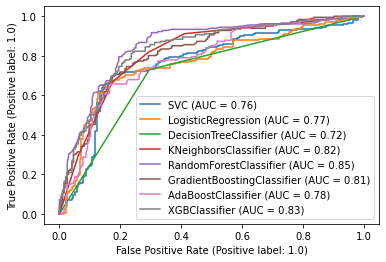

In [297]:
disp=plot_roc_curve(svc,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [303]:
models1=pd.DataFrame()

In [304]:
models1['modelname']=['lr','dt','knc','svc','rf','gbc','ada','xgb']
models1['Testscorebeforehypertuning']=[75,71.8,76.06,75.26,79.78,75.79,72.69,77.65]
models1['CrossvalidScore1']=[74.66,74.73,78.32,75.59,79.38,77.19,74.60,77.86]
models1['Difference1']=[0.33,2.92,2.26,0.33,0.39,1.39,1.99,0.20]
models1['Testscoreafterhypertuning']=['-',75.26,76.86,75.26,75.26,76.06,75.26,75.79]
models1['CrossvalidScore2']=['-',75.53,77.19,75.59,75.73,76.72,75.53,77.59]
models1['Difference2']=['-',0.26,0.33,0.33,0.46,0.66,0.26,1.79]



In [305]:
models1

modelname  Testscorebeforehypertuning  CrossvalidScore1  Difference1  \
0        lr                       75.00             74.66         0.33   
1        dt                       71.80             74.73         2.92   
2       knc                       76.06             78.32         2.26   
3       svc                       75.26             75.59         0.33   
4        rf                       79.78             79.38         0.39   
5       gbc                       75.79             77.19         1.39   
6       ada                       72.69             74.60         1.99   
7       xgb                       77.65             77.86         0.20   

  Testscoreafterhypertuning CrossvalidScore2 Difference2  
0                         -                -           -  
1                     75.26            75.53        0.26  
2                     76.86            77.19        0.33  
3                     75.26            75.59        0.33  
4                     75.26            75.73        0.46  
5                     76.06            76.72        0.66  
6                     75.26            75.53        0.26  
7                     75.79            77.59        1.79

In [306]:
#Choosing xgb classifier as the Best Model,as the difference between the cross valid score and the testscore is less.
#Area under curve for XGB is also 0.83 ,Hence saving the model with xgbClassifier

# ModelSaving

In [307]:
import pickle
filename='insurance_fraudlence.pkl'
pickle.dump(xgb,open(filename,'wb'))

In [310]:
loaded_model=pickle.load(open('insurance_fraudlence.pkl','rb'))
result=loaded_model.score(x_test,y_test)*100
result

77.6595744680851

In [311]:
prediction=loaded_model.predict(x_test)
a=np.array(y_test)
predicted=np.array(prediction)
conclusion=pd.DataFrame({'Actual':a,'predicted':predicted})
conclusion

Actual  predicted
0       0.0          1
1       0.0          0
2       1.0          1
3       1.0          1
4       1.0          1
..      ...        ...
371     0.0          0
372     0.0          0
373     0.0          1
374     0.0          0
375     1.0          0

[376 rows x 2 columns]